# Without PCA LDA

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Load the dataset
data = pd.read_csv("B:/Projects/PycharmProjects/PPMI_Research_on_Parkinson's/src/mahbub/finalDatasetWithUPDRSScore.csv")

# Define non-feature, numerical, and categorical columns
non_feature_columns = ['Patient ID', 'Visit Date', 'UPDRS_SCORE', 'Visit', 'Visit_int']
numerical_features = [
    'Area', 'Circularity', 'ConvexArea', 'EquivDiameter', 'Extent',
    'FilledArea', 'Kurtosis', 'Major axis length', 'Mean',
    'Minor axis length', 'PA_ratio', 'Shannon_Entropy', 'Skewness',
    'Solidity', 'Standard Deviation', 'brightness', 'contrast',
    'correlation', 'dissimilarity', 'energy', 'gabor_energy',
    'gabor_entropy', 'homogeneity', 'lbp_energy', 'lbp_entropy',
    'DATSCAN_CAUDATE_R', 'DATSCAN_CAUDATE_L', 'DATSCAN_PUTAMEN_R',
    'DATSCAN_PUTAMEN_L', 'DATSCAN_PUTAMEN_R_ANT', 'DATSCAN_PUTAMEN_L_ANT'
]
categorical_features = [
    'NP1ANXS', 'NP1APAT', 'NP1COG', 'NP1DDS', 'NP1DPRS',
    'NP1HALL', 'NP1CNST', 'NP1FATG', 'NP1LTHD', 'NP1PAIN', 'NP1SLPD',
    'NP1SLPN', 'NP1URIN', 'NP2DRES', 'NP2EAT', 'NP2FREZ', 'NP2HOBB',
    'NP2HWRT', 'NP2HYGN', 'NP2RISE', 'NP2SALV', 'NP2SPCH', 'NP2SWAL',
    'NP2TRMR', 'NP2TURN', 'NP2WALK', 'NP3BRADY', 'NP3FACXP', 'NP3FRZGT',
    'NP3FTAPL', 'NP3FTAPR', 'NP3GAIT', 'NP3HMOVL', 'NP3HMOVR', 'NP3KTRML',
    'NP3KTRMR', 'NP3LGAGL', 'NP3LGAGR', 'NP3POSTR', 'NP3PRSPL', 'NP3PRSPR',
    'NP3PSTBL', 'NP3PTRML', 'NP3PTRMR', 'NP3RIGLL', 'NP3RIGLU', 'NP3RIGN',
    'NP3RIGRL', 'NP3RIGRU', 'NP3RISNG', 'NP3RTALJ', 'NP3RTALL', 'NP3RTALU',
    'NP3RTARL', 'NP3RTARU', 'NP3RTCON', 'NP3SPCH', 'NP3TTAPL', 'NP3TTAPR',
    'NHY'
]
target_column = "Disease_Severity"

# Preprocessing pipeline for numerical features
scaler = MinMaxScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Split data into X (features) and y (target)
X = data[numerical_features + categorical_features]
y = data[target_column]

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'AdaBoost': AdaBoostClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Naïve Bayes': GaussianNB(),
    'XGB': XGBClassifier()
}

# Train and evaluate each classifier using original features
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    # Calculate metrics for training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    
    # Calculate metrics for testing set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    # Print metrics
    print(f"\n{name}:")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Testing Accuracy: {test_accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")



Random Forest:
Training Accuracy: 1.0000
Testing Accuracy: 0.6204
Precision: 0.6055
Recall: 0.6204
F1-score: 0.5793

Logistic Regression:
Training Accuracy: 0.9937
Testing Accuracy: 0.8431
Precision: 0.8486
Recall: 0.8431
F1-score: 0.8380

AdaBoost:
Training Accuracy: 0.4843
Testing Accuracy: 0.4599
Precision: 0.4335
Recall: 0.4599
F1-score: 0.4051


B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Decision Tree:
Training Accuracy: 1.0000
Testing Accuracy: 0.4234
Precision: 0.4233
Recall: 0.4234
F1-score: 0.4188

Gradient Boosting:
Training Accuracy: 1.0000
Testing Accuracy: 0.6460
Precision: 0.6305
Recall: 0.6460
F1-score: 0.6235

KNN:
Training Accuracy: 0.7398
Testing Accuracy: 0.5839
Precision: 0.6053
Recall: 0.5839
F1-score: 0.5650

SVM:
Training Accuracy: 0.9796
Testing Accuracy: 0.8212
Precision: 0.8541
Recall: 0.8212
F1-score: 0.8108

Naïve Bayes:
Training Accuracy: 0.5533
Testing Accuracy: 0.4854
Precision: 0.6255
Recall: 0.4854
F1-score: 0.4778

XGB:
Training Accuracy: 1.0000
Testing Accuracy: 0.6314
Precision: 0.6165
Recall: 0.6314
F1-score: 0.5984


# PCA components are linear combinations of original feature

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
data = pd.read_csv("B:/Projects/PycharmProjects/PPMI_Research_on_Parkinson's/src/mahbub/finalDatasetWithUPDRSScore.csv")

# Define non-feature, numerical, and categorical columns
non_feature_columns = ['Patient ID', 'Visit Date', 'UPDRS_SCORE', 'Visit','Visit_int']
numerical_features = [
    'Area', 'Circularity', 'ConvexArea', 'EquivDiameter', 'Extent',
    'FilledArea', 'Kurtosis', 'Major axis length', 'Mean',
    'Minor axis length', 'PA_ratio', 'Shannon_Entropy', 'Skewness',
    'Solidity', 'Standard Deviation', 'brightness', 'contrast',
    'correlation', 'dissimilarity', 'energy', 'gabor_energy',
    'gabor_entropy', 'homogeneity', 'lbp_energy', 'lbp_entropy',
    'DATSCAN_CAUDATE_R', 'DATSCAN_CAUDATE_L', 'DATSCAN_PUTAMEN_R',
    'DATSCAN_PUTAMEN_L', 'DATSCAN_PUTAMEN_R_ANT', 'DATSCAN_PUTAMEN_L_ANT'
]
categorical_features = [
    'NP1ANXS', 'NP1APAT', 'NP1COG', 'NP1DDS', 'NP1DPRS',
    'NP1HALL', 'NP1CNST', 'NP1FATG', 'NP1LTHD', 'NP1PAIN', 'NP1SLPD',
    'NP1SLPN', 'NP1URIN', 'NP2DRES', 'NP2EAT', 'NP2FREZ', 'NP2HOBB',
    'NP2HWRT', 'NP2HYGN', 'NP2RISE', 'NP2SALV', 'NP2SPCH', 'NP2SWAL',
    'NP2TRMR', 'NP2TURN', 'NP2WALK', 'NP3BRADY', 'NP3FACXP', 'NP3FRZGT',
    'NP3FTAPL', 'NP3FTAPR', 'NP3GAIT', 'NP3HMOVL', 'NP3HMOVR', 'NP3KTRML',
    'NP3KTRMR', 'NP3LGAGL', 'NP3LGAGR', 'NP3POSTR', 'NP3PRSPL', 'NP3PRSPR',
    'NP3PSTBL', 'NP3PTRML', 'NP3PTRMR', 'NP3RIGLL', 'NP3RIGLU', 'NP3RIGN',
    'NP3RIGRL', 'NP3RIGRU', 'NP3RISNG', 'NP3RTALJ', 'NP3RTALL', 'NP3RTALU',
    'NP3RTARL', 'NP3RTARU', 'NP3RTCON', 'NP3SPCH', 'NP3TTAPL', 'NP3TTAPR',
    'NHY'
]
target_column = "Disease_Severity"

# Preprocessing pipeline for numerical features
scaler = MinMaxScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Split data into X (features) and y (target)
X = data[numerical_features + categorical_features]
y = data[target_column]

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=10)  # Adjust the number of components as needed
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Print the explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio of each principal component:\n", explained_variance)

# Print the most valuable features for each principal component
components = pca.components_
most_valuable_features = [np.abs(components[i]).argmax() for i in range(components.shape[0])]
most_valuable_features_names = [X.columns[i] for i in most_valuable_features]

print("\nMost valuable features for each principal component:")
for i, feature in enumerate(most_valuable_features_names):
    print(f"Principal Component {i+1}: {feature}")

# Define classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'AdaBoost': AdaBoostClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Naïve Bayes': GaussianNB(),
    'XGB': XGBClassifier()
}

# Train and evaluate each classifier using PCA reduced features
for name, clf in classifiers.items():
    clf.fit(X_train_pca, y_train)
    y_train_pred = clf.predict(X_train_pca)
    y_test_pred = clf.predict(X_test_pca)
    
    # Calculate metrics for training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    
    # Calculate metrics for testing set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    # Print metrics
    print(f"\n{name}:")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Testing Accuracy: {test_accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")


Explained variance ratio of each principal component:
 [0.18554571 0.10654163 0.07600051 0.07303982 0.03795287 0.03237153
 0.02826602 0.02763832 0.02380607 0.0212847 ]

Most valuable features for each principal component:
Principal Component 1: NP3FTAPL
Principal Component 2: NP3FTAPL
Principal Component 3: NP3RTCON
Principal Component 4: NP3RTCON
Principal Component 5: NP1SLPN
Principal Component 6: NP3RIGN
Principal Component 7: NP1SLPN
Principal Component 8: NP2HWRT
Principal Component 9: NP3TTAPL
Principal Component 10: NP2HWRT

Random Forest:
Training Accuracy: 1.0000
Testing Accuracy: 0.8321
Precision: 0.8340
Recall: 0.8321
F1-score: 0.8286

Logistic Regression:
Training Accuracy: 0.9373
Testing Accuracy: 0.8796
Precision: 0.8910
Recall: 0.8796
F1-score: 0.8765


B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



AdaBoost:
Training Accuracy: 0.5392
Testing Accuracy: 0.5036
Precision: 0.3291
Recall: 0.5036
F1-score: 0.3840

Decision Tree:
Training Accuracy: 1.0000
Testing Accuracy: 0.8029
Precision: 0.8089
Recall: 0.8029
F1-score: 0.8021

Gradient Boosting:
Training Accuracy: 1.0000
Testing Accuracy: 0.8686
Precision: 0.8725
Recall: 0.8686
F1-score: 0.8677

KNN:
Training Accuracy: 0.8386
Testing Accuracy: 0.7445
Precision: 0.7578
Recall: 0.7445
F1-score: 0.7306

SVM:
Training Accuracy: 0.9357
Testing Accuracy: 0.8358
Precision: 0.8525
Recall: 0.8358
F1-score: 0.8258

Naïve Bayes:
Training Accuracy: 0.8307
Testing Accuracy: 0.7737
Precision: 0.7874
Recall: 0.7737
F1-score: 0.7669

XGB:
Training Accuracy: 1.0000
Testing Accuracy: 0.8613
Precision: 0.8760
Recall: 0.8613
F1-score: 0.8577


In [7]:
# 1. Explained Variance
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio of each principal component:\n", explained_variance)

Explained variance ratio of each principal component:
 [0.18554571 0.10654163 0.07600051 0.07303982 0.03795287 0.03237153
 0.02826602 0.02763832 0.02380607 0.0212847 ]


Cumulative explained variance:
 [0.18554571 0.29208734 0.36808785 0.44112767 0.47908054 0.51145207
 0.53971808 0.56735641 0.59116248 0.61244718]


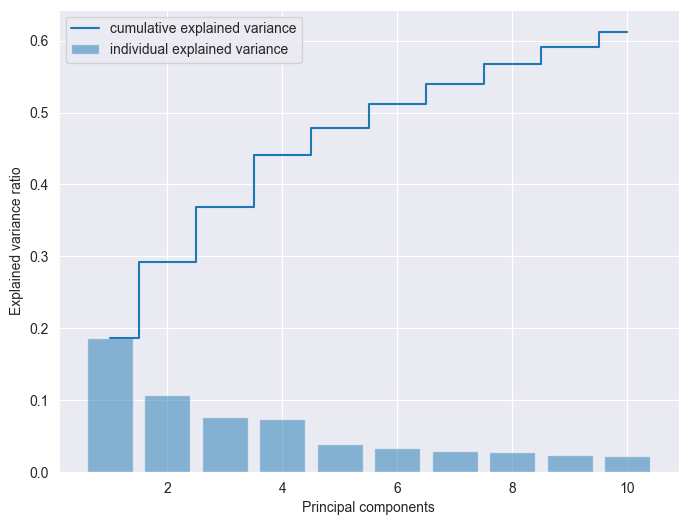

In [8]:
# 2. Cumulative Variance
cumulative_variance = np.cumsum(explained_variance)
print("Cumulative explained variance:\n", cumulative_variance)

# Plot the explained variance ratio and cumulative variance
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [9]:
len(X_train_pca)

638

In [10]:
len(X_test_pca)

274

In [11]:
components = pca.components_
feature_names = X.columns

print("\nTop 20 features for each principal component:")
for i in range(components.shape[0]):
    top_features_indices = np.argsort(np.abs(components[i]))[::-1][:5]
    top_features = feature_names[top_features_indices]
    print(f"\nPrincipal Component {i+1}:")
    for feature in top_features:
        print(f"{feature}")


Top 20 features for each principal component:

Principal Component 1:
NP3FTAPL
NP3HMOVL
NP3TTAPL
NP2SALV
NP2HOBB

Principal Component 2:
NP3FTAPL
NP3PRSPL
NP3RTARU
NP3HMOVL
NP3TTAPL

Principal Component 3:
NP3RTCON
NP3RTARU
NP1SLPN
NP3FTAPR
NP3HMOVR

Principal Component 4:
NP3RTCON
NP2TRMR
NP3RTARU
NP3RTALU
NP1SLPN

Principal Component 5:
NP1SLPN
NP2SALV
NP2SPCH
NP1PAIN
NP2HWRT

Principal Component 6:
NP3RIGN
NP3RIGLL
NP3LGAGR
NP3TTAPR
NP3RIGLU

Principal Component 7:
NP1SLPN
NP2SALV
NP1ANXS
NP1DPRS
NP2WALK

Principal Component 8:
NP2HWRT
NP1URIN
NP3POSTR
NP3GAIT
NP3RISNG

Principal Component 9:
NP3TTAPL
NP3TTAPR
NP3HMOVR
NP2SALV
NP3LGAGR

Principal Component 10:
NP2HWRT
NP1ANXS
NP1DPRS
NP2SALV
NP1SLPD


                 PC1                 PC2                 PC3  \
0  NP3FTAPL (0.2098)  NP3FTAPL (-0.3272)  NP3RTCON (-0.4317)   
1  NP3HMOVL (0.2046)  NP3PRSPL (-0.3269)  NP3RTARU (-0.3026)   
2  NP3TTAPL (0.1989)   NP3RTARU (0.2962)    NP1SLPN (0.2933)   
3   NP2SALV (0.1929)  NP3HMOVL (-0.2776)  NP3FTAPR (-0.2272)   
4   NP2HOBB (0.1895)  NP3TTAPL (-0.2697)  NP3HMOVR (-0.2267)   
5   NP2DRES (0.1894)  NP3RTALU (-0.2589)  NP3PRSPR (-0.1956)   
6  NP3TTAPR (0.1842)  NP3RIGLU (-0.2431)    NP1FATG (0.1940)   
7  NP3FTAPR (0.1822)   NP3RIGRU (0.2252)    NP1SLPD (0.1928)   
8  NP3BRADY (0.1809)  NP3LGAGL (-0.2037)    NP1PAIN (0.1794)   
9  NP3HMOVR (0.1804)   NP3FTAPR (0.1965)    NP2SALV (0.1792)   

                  PC4                 PC5                 PC6  \
0   NP3RTCON (0.6086)    NP1SLPN (0.5251)   NP3RIGN (-0.3604)   
1    NP2TRMR (0.3178)   NP2SALV (-0.4671)  NP3RIGLL (-0.3398)   
2   NP3RTARU (0.2746)   NP2SPCH (-0.3066)   NP3LGAGR (0.2966)   
3   NP3RTALU (0.2710)    NP1PAIN (0

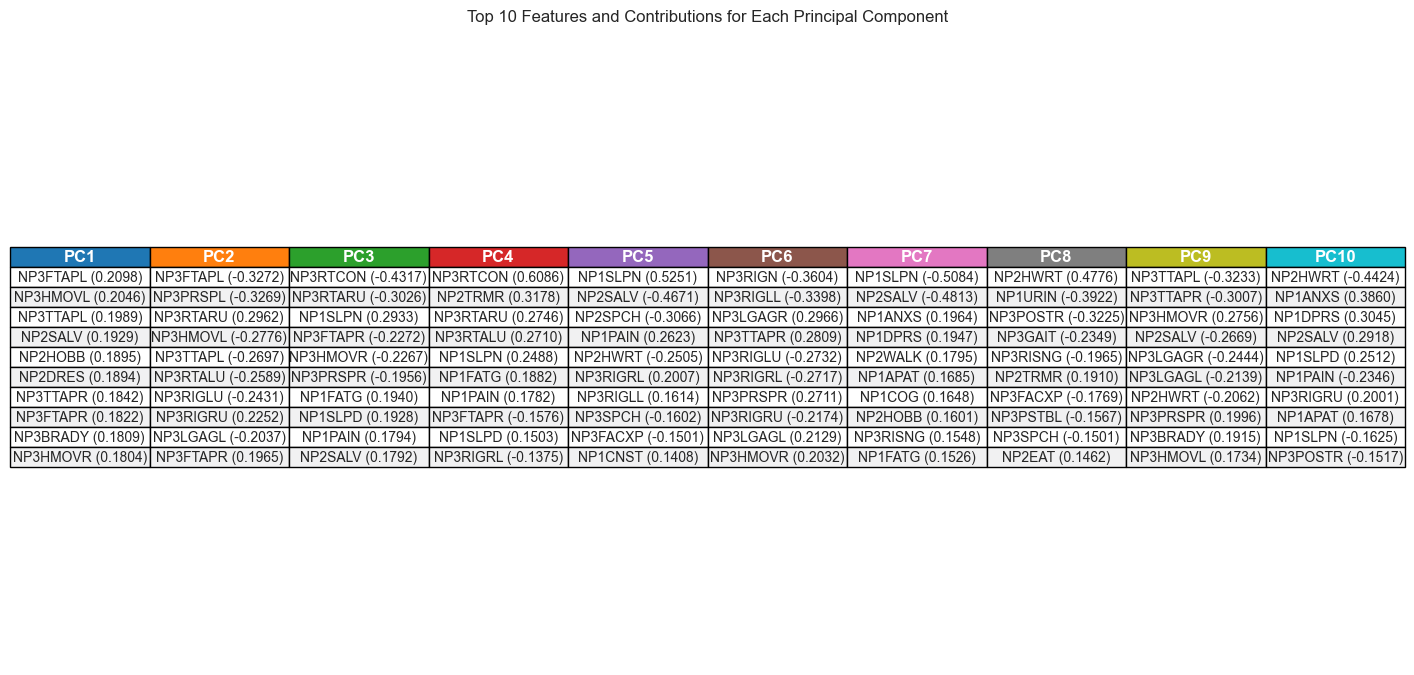

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors as mcolors

# Assuming PCA is already performed and components are stored in 'components'
components = pca.components_
feature_names = X.columns

# Initialize an empty DataFrame to store top features and their contributions for each PCA component
top_features_df = pd.DataFrame()

# Get top 10 features and their contributions for each principal component
top_n = 10  # Number of top features to select
for i in range(components.shape[0]):
    top_features_indices = np.argsort(np.abs(components[i]))[::-1][:top_n]
    top_features = feature_names[top_features_indices]
    top_contributions = components[i, top_features_indices]  # Get the loadings (contributions) with signs

    # Create a new column combining the feature name and its contribution with sign
    top_features_contrib = [f'{feature} ({contrib:.4f})' for feature, contrib in zip(top_features, top_contributions)]
    top_features_df[f'PC{i+1}'] = top_features_contrib  # Store top features with contributions

print(top_features_df)

# Plot the table
fig, ax = plt.subplots(figsize=(15, 8))  # Adjust the size as needed
ax.axis('tight')
ax.axis('off')

# Add cell colors for better visibility
colors = list(mcolors.TABLEAU_COLORS.values())  # Use a color palette from matplotlib
table = ax.table(cellText=top_features_df.values, colLabels=top_features_df.columns, cellLoc='center', loc='center')

# Customize table style
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Set background colors for the header and each row
for i in range(len(top_features_df.columns)):
    table[0, i].set_fontsize(12)
    table[0, i].set_text_props(weight='bold', color='white')
    table[0, i].set_facecolor(colors[i % len(colors)])  # Cycle through colors for headers

# Set alternating row colors for better readability
for i in range(1, top_n+1):
    for j in range(len(top_features_df.columns)):
        table[i, j].set_facecolor('#f1f1f2' if i % 2 == 0 else '#ffffff')  # Light gray and white

plt.title("Top 10 Features and Contributions for Each Principal Component", pad=20)
plt.show()


In [13]:
top_features_union = set()

for i in range(components.shape[0]):
    top_features_indices = np.argsort(np.abs(components[i]))[::-1][:10]
    top_features = feature_names[top_features_indices]
    top_features_union.update(top_features)

# Print the union of top features and its length
print("\nUnion of top 20 features for each principal component:")
print(top_features_union)
print(f"\nLength of union features: {len(top_features_union)}")


Union of top 20 features for each principal component:
{'NP2SALV', 'NP3BRADY', 'NP1SLPN', 'NP1SLPD', 'NP1APAT', 'NP1DPRS', 'NP3RIGRL', 'NP3HMOVL', 'NP2SPCH', 'NP3RIGN', 'NP2DRES', 'NP3RTARU', 'NP3RISNG', 'NP3PRSPL', 'NP2EAT', 'NP1URIN', 'NP3FTAPL', 'NP2TRMR', 'NP3LGAGR', 'NP1PAIN', 'NP3RIGRU', 'NP3RTALU', 'NP3FACXP', 'NP3GAIT', 'NP2HOBB', 'NP3RTCON', 'NP1COG', 'NP3TTAPR', 'NP2HWRT', 'NP3RIGLL', 'NP3SPCH', 'NP1FATG', 'NP1CNST', 'NP3POSTR', 'NP1ANXS', 'NP2WALK', 'NP3PSTBL', 'NP3FTAPR', 'NP3LGAGL', 'NP3PRSPR', 'NP3TTAPL', 'NP3HMOVR', 'NP3RIGLU'}

Length of union features: 43


In [14]:
# 3. Principal Component Scores
print("Principal Component Scores (first 5 samples):\n", X_train_pca[:5])

Principal Component Scores (first 5 samples):
 [[ 3.73159684  0.26652253  0.37881277 -0.65694404  1.32838374  0.12648646
  -0.70963877  2.2788364  -0.81544149  1.79714076]
 [-2.30295172  2.4818352  -0.38991853  0.34029195 -0.09654812  0.26724343
   1.03922072  0.35011653  0.33817637  0.52072989]
 [ 0.63881645  2.32274971  0.48831541  0.12184811 -0.27869522 -0.09956343
   1.3962598   1.8914528  -0.00812512  1.50733578]
 [ 0.87291372  1.02818148  1.34078307 -1.52708401 -0.29190247 -1.37721724
   0.23903594 -1.3745074  -0.21010482  0.42108852]
 [ 1.12414228  2.06783971 -1.11811391 -1.21460964 -2.05626123 -0.19671117
  -1.9480196  -0.84444291  1.91283581  0.99003927]]


In [15]:
# 4. Loading Scores
loading_scores = pd.DataFrame(pca.components_.T, index=X.columns, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
print("\nLoading scores (contributions of each feature to the principal components):")
print(loading_scores)


Loading scores (contributions of each feature to the principal components):
                    PC1       PC2       PC3       PC4       PC5       PC6  \
Area          -0.003017 -0.000343  0.014127 -0.014191 -0.000916  0.003308   
Circularity    0.002681 -0.002899 -0.002011  0.000294 -0.003487 -0.005465   
ConvexArea    -0.001486  0.001210  0.011414 -0.011530 -0.001983  0.004564   
EquivDiameter -0.007215  0.001598  0.008533 -0.010210  0.000631  0.000054   
Extent        -0.004122  0.000966 -0.006268 -0.005849 -0.003056 -0.007691   
...                 ...       ...       ...       ...       ...       ...   
NP3RTCON      -0.064161 -0.010012 -0.431721  0.608628 -0.003559  0.010353   
NP3SPCH        0.134180 -0.007567 -0.029887 -0.055936 -0.160176 -0.019778   
NP3TTAPL       0.198924 -0.269651 -0.028742  0.017684  0.079022  0.132023   
NP3TTAPR       0.184216  0.149800 -0.139440 -0.051682  0.133976  0.280931   
NHY            0.121963 -0.023088 -0.022690 -0.041929 -0.003517 -0.014795   

In [16]:
# 5. Correlation with Original Features
print("\nCorrelation of each feature with the first principal component:")
correlations = loading_scores['PC1']
print(correlations)


Correlation of each feature with the first principal component:
Area            -0.003017
Circularity      0.002681
ConvexArea      -0.001486
EquivDiameter   -0.007215
Extent          -0.004122
                   ...   
NP3RTCON        -0.064161
NP3SPCH          0.134180
NP3TTAPL         0.198924
NP3TTAPR         0.184216
NHY              0.121963
Name: PC1, Length: 91, dtype: float64


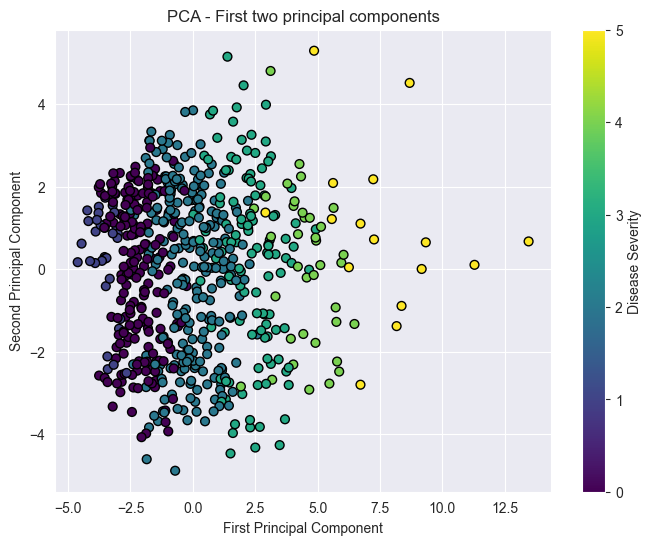

In [17]:
# 6. Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=40)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA - First two principal components')
plt.colorbar(label='Disease Severity')
plt.show()


In [18]:

# 7. Noise Reduction
# Let's assume that components with very low explained variance represent noise.
threshold = 0.01  # Variance ratio threshold to determine if a component is considered noise
num_components = np.sum(explained_variance > threshold)
print(f"\nNumber of components to retain to reduce noise: {num_components}")


Number of components to retain to reduce noise: 10


In [19]:

# 8. Feature Importance
most_valuable_features = [np.abs(pca.components_[i]).argmax() for i in range(pca.components_.shape[0])]
most_valuable_features_names = [X.columns[i] for i in most_valuable_features]


print("\nMost valuable features for each principal component:")
for i, feature in enumerate(most_valuable_features_names):
    print(f"Principal Component {i+1}: {feature}")


Most valuable features for each principal component:
Principal Component 1: NP3FTAPL
Principal Component 2: NP3FTAPL
Principal Component 3: NP3RTCON
Principal Component 4: NP3RTCON
Principal Component 5: NP1SLPN
Principal Component 6: NP3RIGN
Principal Component 7: NP1SLPN
Principal Component 8: NP2HWRT
Principal Component 9: NP3TTAPL
Principal Component 10: NP2HWRT



Correlation matrix of principal components:
 [[ 1.00000000e+00 -5.31808918e-17  1.83651219e-17 -5.35246916e-18
   0.00000000e+00  2.00998323e-17  1.72080527e-17  0.00000000e+00
  -9.37540853e-18 -3.47031028e-17]
 [-5.31808918e-17  1.00000000e+00  9.17502890e-17  6.53373773e-17
  -9.18647333e-18  5.03978287e-17  3.40634614e-17 -1.54298767e-17
   1.23724581e-17  3.27119220e-18]
 [ 1.83651219e-17  9.17502890e-17  1.00000000e+00 -3.21459673e-17
   8.70142151e-18  1.57028915e-17  2.85678698e-17 -1.01966296e-17
  -2.65512767e-17 -1.25875389e-17]
 [-5.35246916e-18  6.53373773e-17 -3.21459673e-17  1.00000000e+00
   2.44090739e-16 -2.88323830e-17  3.77120395e-16  1.38683177e-17
   1.77447308e-16 -7.11145344e-17]
 [ 0.00000000e+00 -9.18647333e-18  8.70142151e-18  2.44090739e-16
   1.00000000e+00 -3.61092922e-17 -4.73819846e-16  7.81582333e-17
  -2.95398467e-16 -5.75483323e-17]
 [ 2.00998323e-17  5.03978287e-17  1.57028915e-17 -2.88323830e-17
  -3.61092922e-17  1.00000000e+00  4.18668101e-16  1.

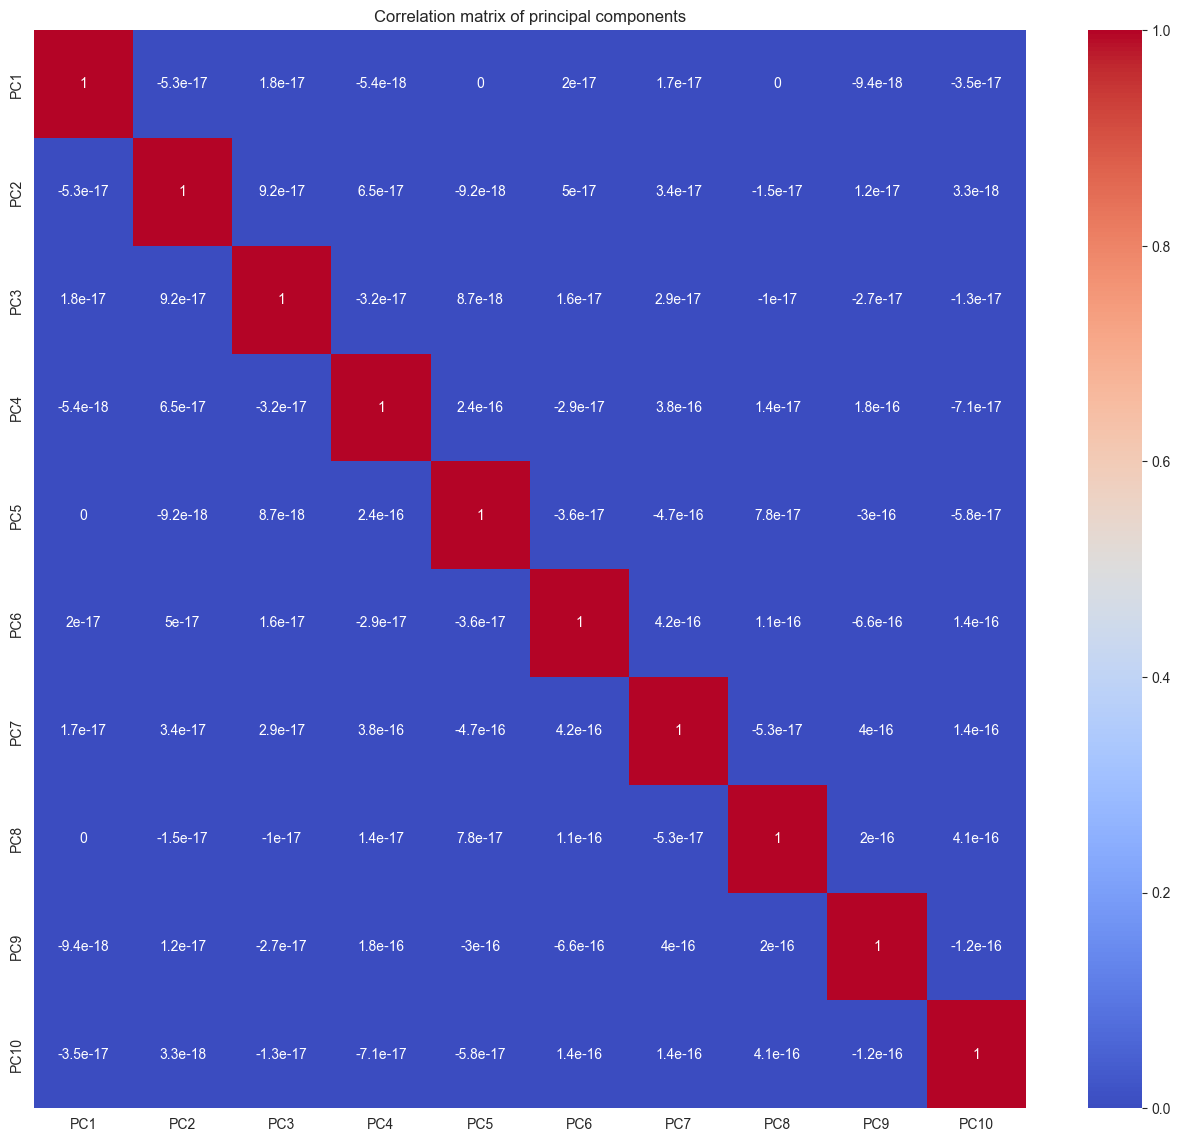

In [20]:
# 9. Multicollinearity
# PCA components are orthogonal, hence uncorrelated
correlation_matrix = np.corrcoef(X_train_pca.T)
print("\nCorrelation matrix of principal components:\n", correlation_matrix)

plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', xticklabels=[f'PC{i+1}' for i in range(pca.n_components_)], yticklabels=[f'PC{i+1}' for i in range(pca.n_components_)])
plt.title('Correlation matrix of principal components')
plt.show()

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("B:/Projects/PycharmProjects/PPMI_Research_on_Parkinson's/src/mahbub/finalDatasetWithUPDRSScore.csv")

# Define non-feature, numerical, and categorical columns
non_feature_columns = ['Patient ID', 'Visit Date', 'UPDRS_SCORE', 'Visit']
numerical_features = [
    'Area', 'Circularity', 'ConvexArea', 'EquivDiameter', 'Extent',
    'FilledArea', 'Kurtosis', 'Major axis length', 'Mean',
    'Minor axis length', 'PA_ratio', 'Shannon_Entropy', 'Skewness',
    'Solidity', 'Standard Deviation', 'brightness', 'contrast',
    'correlation', 'dissimilarity', 'energy', 'gabor_energy',
    'gabor_entropy', 'homogeneity', 'lbp_energy', 'lbp_entropy',
    'DATSCAN_CAUDATE_R', 'DATSCAN_CAUDATE_L', 'DATSCAN_PUTAMEN_R',
    'DATSCAN_PUTAMEN_L', 'DATSCAN_PUTAMEN_R_ANT', 'DATSCAN_PUTAMEN_L_ANT'
]
categorical_features = [
    'NP1ANXS', 'NP1APAT', 'NP1COG', 'NP1DDS', 'NP1DPRS',
    'NP1HALL', 'NP1CNST', 'NP1FATG', 'NP1LTHD', 'NP1PAIN', 'NP1SLPD',
    'NP1SLPN', 'NP1URIN', 'NP2DRES', 'NP2EAT', 'NP2FREZ', 'NP2HOBB',
    'NP2HWRT', 'NP2HYGN', 'NP2RISE', 'NP2SALV', 'NP2SPCH', 'NP2SWAL',
    'NP2TRMR', 'NP2TURN', 'NP2WALK', 'NP3BRADY', 'NP3FACXP', 'NP3FRZGT',
    'NP3FTAPL', 'NP3FTAPR', 'NP3GAIT', 'NP3HMOVL', 'NP3HMOVR', 'NP3KTRML',
    'NP3KTRMR', 'NP3LGAGL', 'NP3LGAGR', 'NP3POSTR', 'NP3PRSPL', 'NP3PRSPR',
    'NP3PSTBL', 'NP3PTRML', 'NP3PTRMR', 'NP3RIGLL', 'NP3RIGLU', 'NP3RIGN',
    'NP3RIGRL', 'NP3RIGRU', 'NP3RISNG', 'NP3RTALJ', 'NP3RTALL', 'NP3RTALU',
    'NP3RTARL', 'NP3RTARU', 'NP3RTCON', 'NP3SPCH', 'NP3TTAPL', 'NP3TTAPR',
    'NHY'
]
target_column = "Disease_Severity"

# Scale numerical features
scaler = MinMaxScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Split data into X (features) and y (target)
X = data[numerical_features + categorical_features]
y = data[target_column]

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

n_components = 5 # min(X.shape[1], len(np.unique(y)) - 1)  # Ensure n_components is within valid range
print(n_components)
lda = LDA(n_components=n_components)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Define classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'AdaBoost': AdaBoostClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Naïve Bayes': GaussianNB(),
    'XGB': XGBClassifier()
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train_lda, y_train)
    y_train_pred = clf.predict(X_train_lda)
    y_test_pred = clf.predict(X_test_lda)
    
    # Calculate metrics for training data
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred, average='weighted')
    train_recall = recall_score(y_train, y_train_pred, average='weighted')
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    
    # Calculate metrics for testing data
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='weighted')
    test_recall = recall_score(y_test, y_test_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    # Print metrics
    print(f"\n{name}:")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Testing Accuracy: {test_accuracy:.4f}")
    print(f"Testing Precision: {test_precision:.4f}")
    print(f"Testing Recall: {test_recall:.4f}")
    print(f"Testing F1-score: {test_f1:.4f}")




5

Random Forest:
Training Accuracy: 1.0000
Testing Accuracy: 0.9126
Testing Precision: 0.9197
Testing Recall: 0.9126
Testing F1-score: 0.9122

Logistic Regression:
Training Accuracy: 0.9643
Testing Accuracy: 0.8743
Testing Precision: 0.8875
Testing Recall: 0.8743
Testing F1-score: 0.8720

AdaBoost:
Training Accuracy: 0.8944
Testing Accuracy: 0.8142
Testing Precision: 0.7582
Testing Recall: 0.8142
Testing F1-score: 0.7781

Decision Tree:
Training Accuracy: 1.0000
Testing Accuracy: 0.8962
Testing Precision: 0.9043
Testing Recall: 0.8962
Testing F1-score: 0.8938


B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Gradient Boosting:
Training Accuracy: 1.0000
Testing Accuracy: 0.8907
Testing Precision: 0.9000
Testing Recall: 0.8907
Testing F1-score: 0.8901

KNN:
Training Accuracy: 0.9657
Testing Accuracy: 0.8415
Testing Precision: 0.8481
Testing Recall: 0.8415
Testing F1-score: 0.8378

SVM:
Training Accuracy: 0.9698
Testing Accuracy: 0.8907
Testing Precision: 0.9015
Testing Recall: 0.8907
Testing F1-score: 0.8895

Naïve Bayes:
Training Accuracy: 0.9575
Testing Accuracy: 0.9071
Testing Precision: 0.9190
Testing Recall: 0.9071
Testing F1-score: 0.9088

XGB:
Training Accuracy: 1.0000
Testing Accuracy: 0.8907
Testing Precision: 0.8996
Testing Recall: 0.8907
Testing F1-score: 0.8906


           Feature LD1  Scaling LD1         Feature LD2  Scaling LD2
0      Shannon_Entropy   -12.627587                Area   107.803536
1             contrast    12.236485          FilledArea  -104.589562
2   Standard Deviation   -11.251527         homogeneity    46.040089
3        gabor_entropy   -11.150114  Standard Deviation   -36.754253
4          homogeneity    -9.612906            Skewness   -34.425123
5        dissimilarity    -9.330490     Shannon_Entropy    32.515435
6                 Area     8.799593            contrast    19.010071
7           FilledArea    -8.504989            Kurtosis    18.232062
8               energy    -6.943889              energy   -17.857968
9             Skewness    -6.151430       dissimilarity   -12.947126
10        gabor_energy     5.784121       gabor_entropy    -7.794006
11          brightness     5.630897          brightness     6.358834
12                Mean     5.630897                Mean     6.358834
13   Major axis length     3.81876

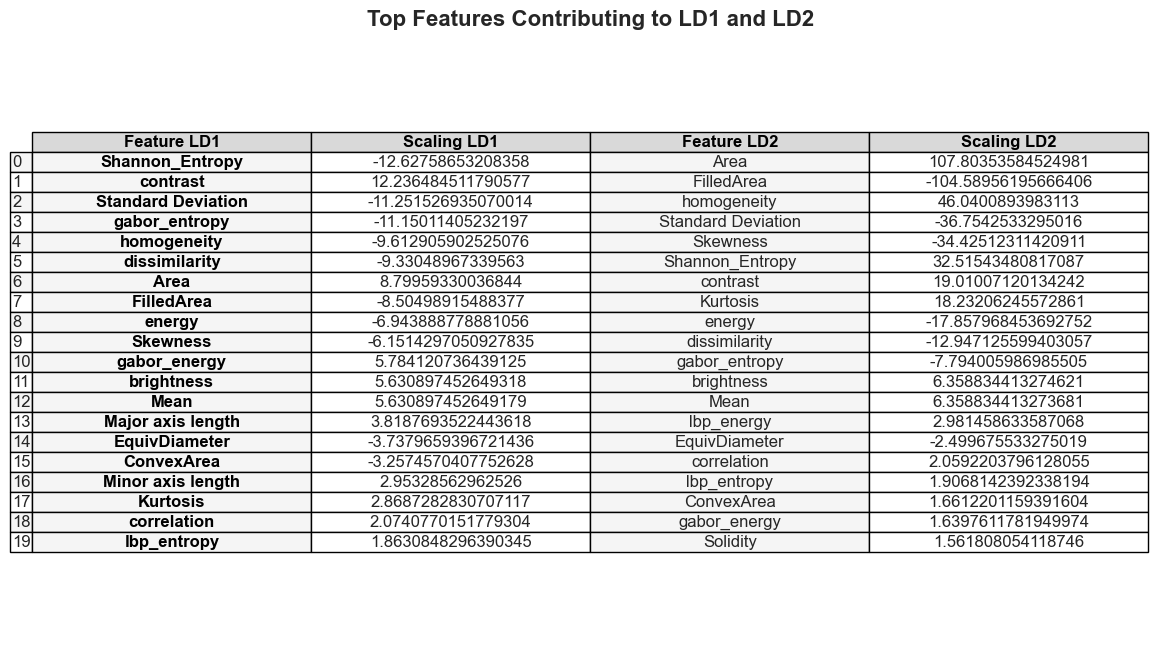

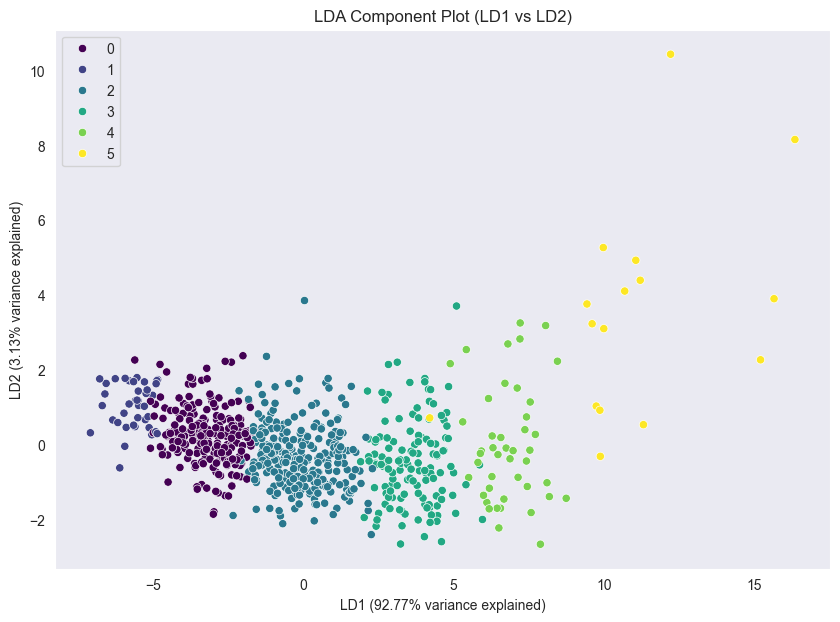


Top 20 important features according to Random Forest:
                  Feature  Importance
69               NP3POSTR    0.021870
27      DATSCAN_PUTAMEN_R    0.020583
44                NP2DRES    0.020295
77                NP3RIGN    0.018938
90                    NHY    0.018877
47                NP2HOBB    0.018083
25      DATSCAN_CAUDATE_R    0.018029
26      DATSCAN_CAUDATE_L    0.017334
30  DATSCAN_PUTAMEN_L_ANT    0.017185
55                NP2TURN    0.016530
29  DATSCAN_PUTAMEN_R_ANT    0.015824
11        Shannon_Entropy    0.015290
57               NP3BRADY    0.015160
68               NP3LGAGR    0.015092
28      DATSCAN_PUTAMEN_L    0.015047
1             Circularity    0.014948
17            correlation    0.014753
64               NP3HMOVR    0.014568
7       Major axis length    0.014487
88               NP3TTAPL    0.014402


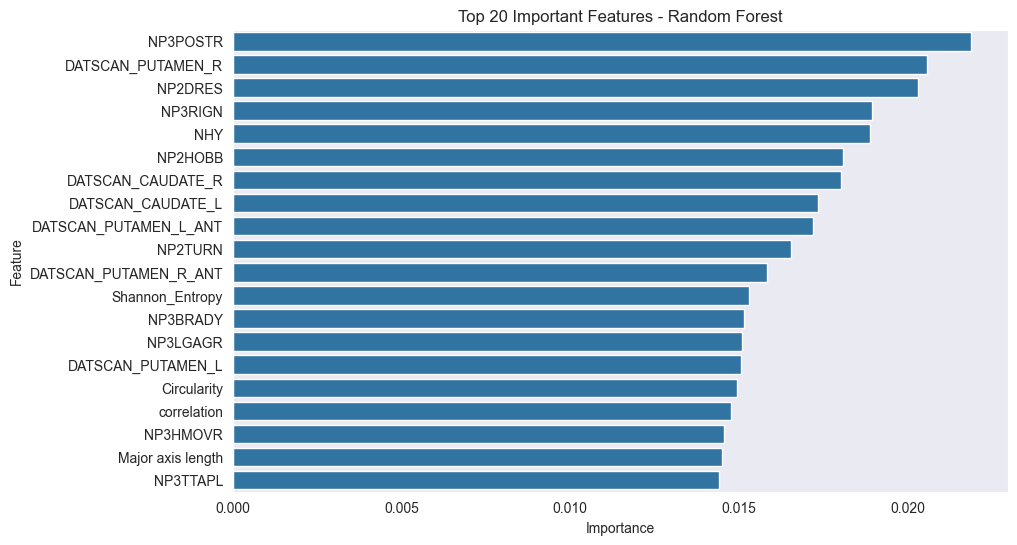


Top 20 selected features by RFE:
     Feature  Ranking
31   NP1ANXS        1
40   NP1PAIN        1
41   NP1SLPD        1
44   NP2DRES        1
45    NP2EAT        1
47   NP2HOBB        1
50   NP2RISE        1
52   NP2SPCH        1
56   NP2WALK        1
58  NP3FACXP        1
60  NP3FTAPL        1
61  NP3FTAPR        1
68  NP3LGAGR        1
69  NP3POSTR        1
70  NP3PRSPL        1
73  NP3PTRML        1
79  NP3RIGRU        1
80  NP3RISNG        1
86  NP3RTCON        1
88  NP3TTAPL        1


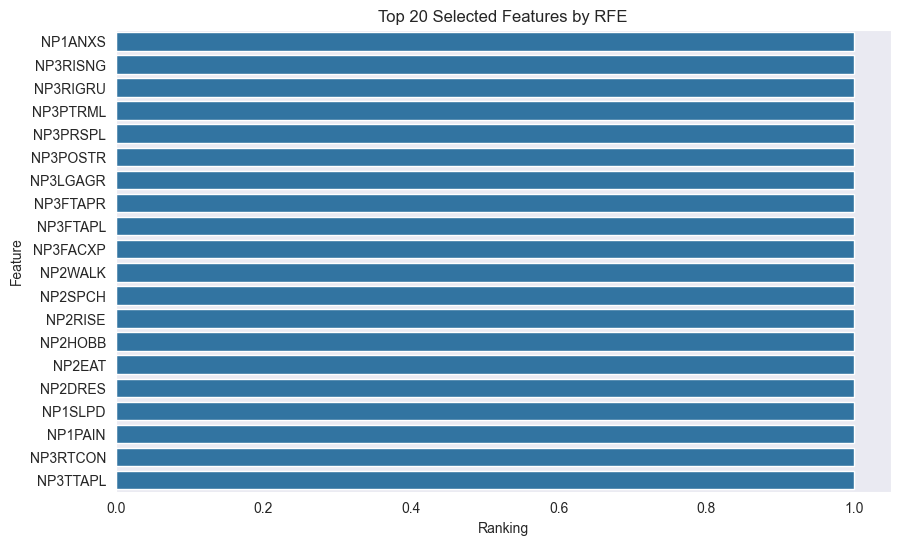


Top 20 selected features by Lasso (L1):
                  Feature  Coefficient
29  DATSCAN_PUTAMEN_R_ANT    -0.555689
11        Shannon_Entropy    -0.543127
77                NP3RIGN    -0.496465
43                NP1URIN    -0.482506
30  DATSCAN_PUTAMEN_L_ANT     0.416840
80               NP3RISNG    -0.393214
67               NP3LGAGL    -0.383602
70               NP3PRSPL    -0.368758
89               NP3TTAPR    -0.366737
40                NP1PAIN    -0.358510
78               NP3RIGRL    -0.358443
52                NP2SPCH    -0.293469
69               NP3POSTR    -0.284493
48                NP2HWRT    -0.283232
38                NP1FATG    -0.264159
86               NP3RTCON    -0.264130
82               NP3RTALL    -0.257692
35                NP1DPRS    -0.257422
47                NP2HOBB    -0.250333
76               NP3RIGLU    -0.244289


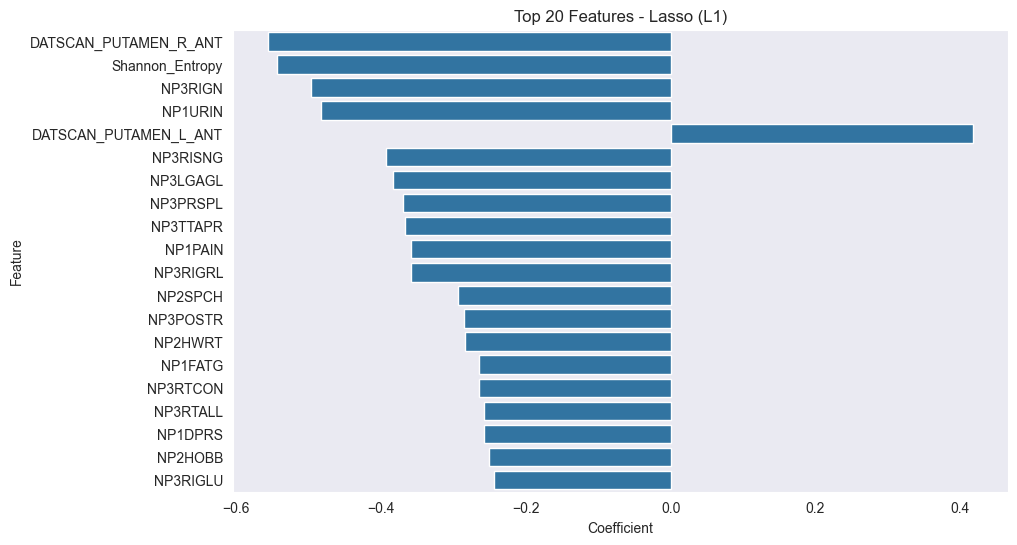


Top 20 features based on Mutual Information:
     Feature  Mutual Information
44   NP2DRES            0.249974
45    NP2EAT            0.179120
50   NP2RISE            0.175809
56   NP2WALK            0.172026
57  NP3BRADY            0.170142
47   NP2HOBB            0.168797
58  NP3FACXP            0.166158
90       NHY            0.156502
69  NP3POSTR            0.152476
67  NP3LGAGL            0.141053
87   NP3SPCH            0.132518
89  NP3TTAPR            0.131560
77   NP3RIGN            0.126283
68  NP3LGAGR            0.125885
46   NP2FREZ            0.122000
88  NP3TTAPL            0.121889
80  NP3RISNG            0.119527
55   NP2TURN            0.115893
79  NP3RIGRU            0.115435
63  NP3HMOVL            0.115261


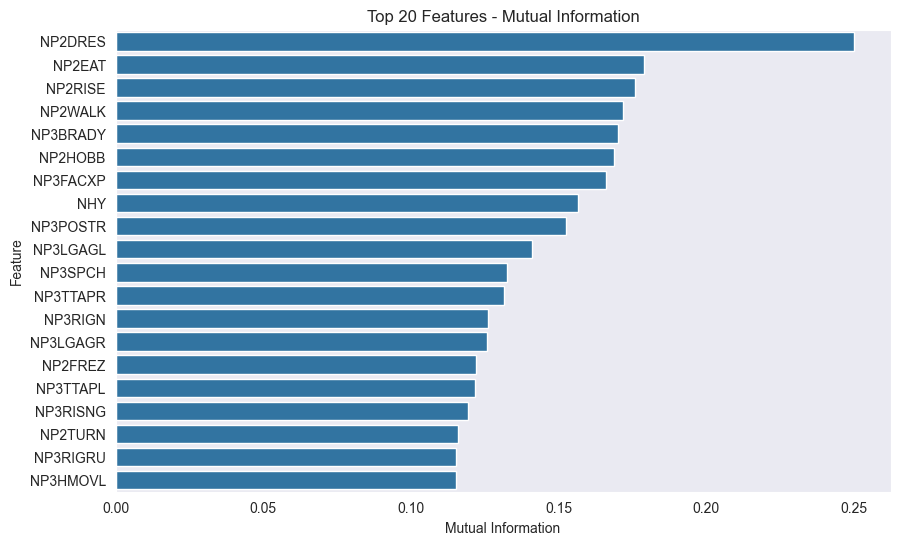

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE, mutual_info_classif, chi2
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("B:/Projects/PycharmProjects/PPMI_Research_on_Parkinson's/src/mahbub/finalDatasetWithUPDRSScore.csv")

# Define non-feature, numerical, and categorical columns
non_feature_columns = ['Patient ID', 'Visit Date', 'UPDRS_SCORE', 'Visit']
numerical_features = [
    'Area', 'Circularity', 'ConvexArea', 'EquivDiameter', 'Extent',
    'FilledArea', 'Kurtosis', 'Major axis length', 'Mean',
    'Minor axis length', 'PA_ratio', 'Shannon_Entropy', 'Skewness',
    'Solidity', 'Standard Deviation', 'brightness', 'contrast',
    'correlation', 'dissimilarity', 'energy', 'gabor_energy',
    'gabor_entropy', 'homogeneity', 'lbp_energy', 'lbp_entropy',
    'DATSCAN_CAUDATE_R', 'DATSCAN_CAUDATE_L', 'DATSCAN_PUTAMEN_R',
    'DATSCAN_PUTAMEN_L', 'DATSCAN_PUTAMEN_R_ANT', 'DATSCAN_PUTAMEN_L_ANT'
]
categorical_features = [
    'NP1ANXS', 'NP1APAT', 'NP1COG', 'NP1DDS', 'NP1DPRS',
    'NP1HALL', 'NP1CNST', 'NP1FATG', 'NP1LTHD', 'NP1PAIN', 'NP1SLPD',
    'NP1SLPN', 'NP1URIN', 'NP2DRES', 'NP2EAT', 'NP2FREZ', 'NP2HOBB',
    'NP2HWRT', 'NP2HYGN', 'NP2RISE', 'NP2SALV', 'NP2SPCH', 'NP2SWAL',
    'NP2TRMR', 'NP2TURN', 'NP2WALK', 'NP3BRADY', 'NP3FACXP', 'NP3FRZGT',
    'NP3FTAPL', 'NP3FTAPR', 'NP3GAIT', 'NP3HMOVL', 'NP3HMOVR', 'NP3KTRML',
    'NP3KTRMR', 'NP3LGAGL', 'NP3LGAGR', 'NP3POSTR', 'NP3PRSPL', 'NP3PRSPR',
    'NP3PSTBL', 'NP3PTRML', 'NP3PTRMR', 'NP3RIGLL', 'NP3RIGLU', 'NP3RIGN',
    'NP3RIGRL', 'NP3RIGRU', 'NP3RISNG', 'NP3RTALJ', 'NP3RTALL', 'NP3RTALU',
    'NP3RTARL', 'NP3RTARU', 'NP3RTCON', 'NP3SPCH', 'NP3TTAPL', 'NP3TTAPR',
    'NHY'
]
target_column = "Disease_Severity"

# Scale numerical features
scaler = MinMaxScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Split data into X (features) and y (target)
X = data[numerical_features + categorical_features]
y = data[target_column]

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the data is already preprocessed and split into X_train, X_test, y_train, y_test

# Instantiate and fit the LDA model
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_train, y_train)

# Get the explained variance ratios for each component
lda_variance_ratios = lda.explained_variance_ratio_

# Extract top 20 features for both LD1 and LD2
top_20_idx_ld1 = np.abs(lda.scalings_[:, 0]).argsort()[::-1][:20]
top_20_features_ld1 = X.columns[top_20_idx_ld1]
top_20_scalings_ld1 = lda.scalings_[top_20_idx_ld1, 0]

top_20_idx_ld2 = np.abs(lda.scalings_[:, 1]).argsort()[::-1][:20]
top_20_features_ld2 = X.columns[top_20_idx_ld2]
top_20_scalings_ld2 = lda.scalings_[top_20_idx_ld2, 1]

# Create a DataFrame to hold the top 20 features and their scalings for both LD1 and LD2
top_features_table = pd.DataFrame({
    'Feature LD1': top_20_features_ld1,
    'Scaling LD1': top_20_scalings_ld1,
    'Feature LD2': top_20_features_ld2,
    'Scaling LD2': top_20_scalings_ld2
})

# Display the table
print(top_features_table)
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))  # Adjust figsize as needed

# Hide axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Create the table
table = plt.table(cellText=top_features_table.values,
                  rowLabels=top_features_table.index,
                  colLabels=top_features_table.columns,
                  cellLoc='center',
                  loc='center')

# Adjust table style
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)  # Adjust scaling as needed

# Styling the table
colors = ['#f5f5f5', '#ffffff']  # Alternating row colors
for i, key in enumerate(table.get_celld().keys()):
    cell = table.get_celld()[key]
    if key[0] == 0:  # Header row
        cell.set_text_props(fontweight='bold', color='black')
        cell.set_facecolor('#d9d9d9')  # Header background color
    elif key[1] == 0:  # First column (index column)
        cell.set_text_props(fontweight='bold', color='black')
        cell.set_facecolor('#f5f5f5')  # Index column background color
    else:
        cell.set_facecolor(colors[i % 2])  # Alternating row colors

# Add border lines
for key in table.get_celld().keys():
    cell = table.get_celld()[key]
    cell.set_edgecolor('black')
    cell.set_linewidth(1)

# Show the plot
plt.title('Top Features Contributing to LD1 and LD2', fontsize=16, weight='bold')
plt.show()


# Plot the LDA components (LD1 and LD2)
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_lda[:, 0], y=X_lda[:, 1], hue=y_train, palette="viridis")
plt.title("LDA Component Plot (LD1 vs LD2)")
plt.xlabel(f"LD1 ({lda_variance_ratios[0]*100:.2f}% variance explained)")
plt.ylabel(f"LD2 ({lda_variance_ratios[1]*100:.2f}% variance explained)")
plt.grid(visible=False)
plt.show()



### 1. Feature Importance using Random Forest ###
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame to store feature names and their importance
rf_feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(20)

print("\nTop 20 important features according to Random Forest:")
print(rf_feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_feature_importance_df)
plt.title('Top 20 Important Features - Random Forest')
plt.grid(visible=False)
plt.show()


### 2. Recursive Feature Elimination (RFE) using Logistic Regression ###
logreg = LogisticRegression(max_iter=1000, random_state=42)
rfe = RFE(logreg, n_features_to_select=20)
rfe.fit(X_train, y_train)

# Create a DataFrame with RFE feature rankings
rfe_features_df = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': rfe.ranking_
})

# Select the top 20 features with rank 1
top_rfe_features = rfe_features_df[rfe_features_df['Ranking'] == 1]
print("\nTop 20 selected features by RFE:")
print(top_rfe_features)

# Plot the top RFE features
plt.figure(figsize=(10, 6))
sns.barplot(x='Ranking', y='Feature', data=top_rfe_features.sort_values(by='Ranking'))
plt.title('Top 20 Selected Features by RFE')
plt.grid(visible=False)
plt.show()


### 3. L1 Regularization (Lasso) for Feature Selection ###
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
lasso.fit(X_train_scaled, y_train)

# Create a DataFrame with feature names and their Lasso coefficients
lasso_features_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False).head(20)

print("\nTop 20 selected features by Lasso (L1):")
print(lasso_features_df)

# Plot the Lasso feature coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=lasso_features_df)
plt.title('Top 20 Features - Lasso (L1)')
plt.grid(visible=False)
plt.show()


### 4. Mutual Information for Feature Selection ###
mi = mutual_info_classif(X, y)

# Create a DataFrame with feature names and their mutual information scores
mi_features_df = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information': mi
}).sort_values(by='Mutual Information', ascending=False).head(20)

print("\nTop 20 features based on Mutual Information:")
print(mi_features_df)

# Plot the Mutual Information scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Mutual Information', y='Feature', data=mi_features_df)
plt.title('Top 20 Features - Mutual Information')
plt.grid(visible=False)
plt.show()





Top 20 features contributing to LD1:
Shannon_Entropy       12.627587
contrast              12.236485
Standard Deviation    11.251527
gabor_entropy         11.150114
homogeneity            9.612906
dissimilarity          9.330490
Area                   8.799593
FilledArea             8.504989
energy                 6.943889
Skewness               6.151430
gabor_energy           5.784121
brightness             5.630897
Mean                   5.630897
Major axis length      3.818769
EquivDiameter          3.737966
ConvexArea             3.257457
Minor axis length      2.953286
Kurtosis               2.868728
correlation            2.074077
lbp_entropy            1.863085
Name: LD1, dtype: float64
Top 20 features contributing to LD2:
Area                  107.803536
FilledArea            104.589562
homogeneity            46.040089
Standard Deviation     36.754253
Skewness               34.425123
Shannon_Entropy        32.515435
contrast               19.010071
Kurtosis               18.232

<Figure size 1200x800 with 0 Axes>

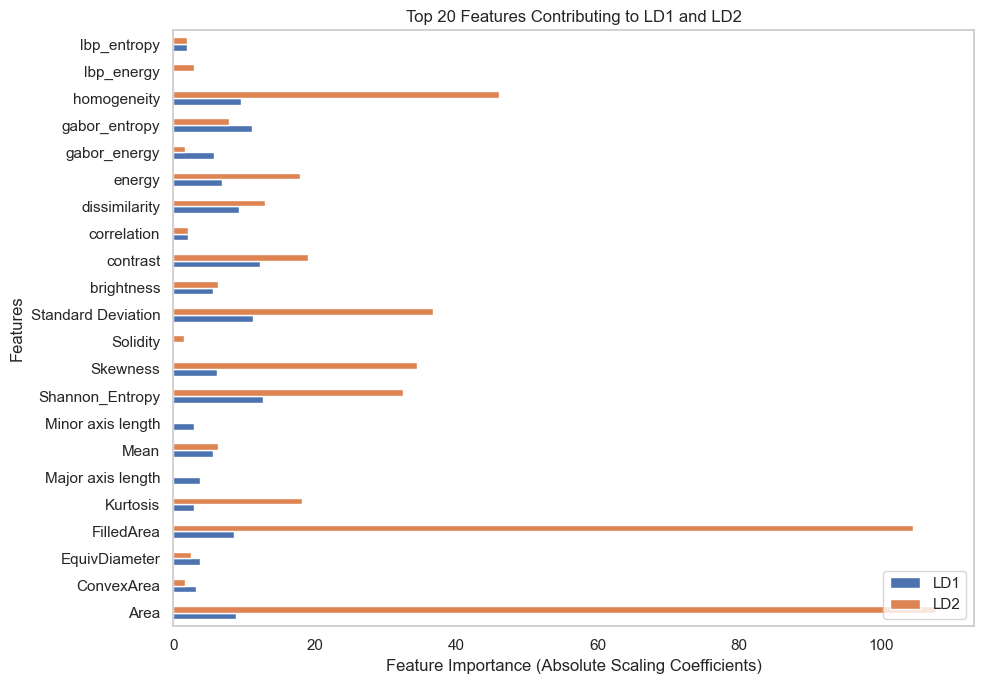

In [68]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the number of LDA components to the number of classes minus one
n_components =5#len(np.unique(y_train)) - 1  # Set based on number of classes

# Initialize and fit the LDA model
lda = LDA(n_components=n_components)
X_train_lda = lda.fit_transform(X_train, y_train)

# Get the absolute values of the scalings (coefficients)
lda_scalings = np.abs(lda.scalings_)

# Create a DataFrame for the feature importance
feature_importance = pd.DataFrame(lda_scalings, index=X.columns, columns=[f'LD{i+1}' for i in range(n_components)])

# Sort the features by their contribution for each LD component
for i in range(n_components):
    top_features = feature_importance[f'LD{i+1}'].sort_values(ascending=False).head(20)
    print(f"Top 20 features contributing to LD{i+1}:")
    print(top_features)

# Extract top 20 features for both LD1 and LD2
top_features_ld1 = feature_importance['LD1'].sort_values(ascending=False).head(20)
top_features_ld2 = feature_importance['LD2'].sort_values(ascending=False).head(20)

# Combine both top feature sets into a single DataFrame for plotting
top_features_combined = pd.DataFrame({
    'LD1': top_features_ld1,
    'LD2': top_features_ld2
})

# Plot both LD1 and LD2 features side by side in a single table
plt.figure(figsize=(12, 8))
top_features_combined.plot(kind='barh', figsize=(10, 7))
plt.title('Top 20 Features Contributing to LD1 and LD2')
plt.xlabel('Feature Importance (Absolute Scaling Coefficients)')
plt.ylabel('Features')
plt.legend(['LD1', 'LD2'], loc='lower right')
plt.grid(False)
plt.tight_layout()
plt.show()


In [24]:
# Print top 20 features for each LDA component
print("Top 20 features for each LDA component:")
for i in range(n_components):
    component_features = np.abs(lda.scalings_[:, i])
    top_20_idx = component_features.argsort()[::-1][:20]
    top_20_features = X.columns[top_20_idx]
    print(f"Component {i+1}: {top_20_features.tolist()}")

# Example of printing the length of union of top 20 features
union_features = set()
for i in range(n_components):
    component_features = np.abs(lda.scalings_[:, i])
    top_20_idx = component_features.argsort()[::-1][:20]
    top_20_features = X.columns[top_20_idx]
    union_features.update(top_20_features.tolist())
print("\nUnion of top 20 features for each LDA component:")
print(union_features)
print(f"\nLength of union of top 20 features across all components: {len(union_features)}")

Top 20 features for each LDA component:
Component 1: ['Shannon_Entropy', 'contrast', 'Standard Deviation', 'gabor_entropy', 'homogeneity', 'dissimilarity', 'Area', 'FilledArea', 'energy', 'Skewness', 'gabor_energy', 'brightness', 'Mean', 'Major axis length', 'EquivDiameter', 'ConvexArea', 'Minor axis length', 'Kurtosis', 'correlation', 'lbp_entropy']
Component 2: ['Area', 'FilledArea', 'homogeneity', 'Standard Deviation', 'Skewness', 'Shannon_Entropy', 'contrast', 'Kurtosis', 'energy', 'dissimilarity', 'gabor_entropy', 'brightness', 'Mean', 'lbp_energy', 'EquivDiameter', 'correlation', 'lbp_entropy', 'ConvexArea', 'gabor_energy', 'Solidity']

Union of top 20 features for each LDA component:
{'contrast', 'FilledArea', 'Area', 'ConvexArea', 'homogeneity', 'Kurtosis', 'Solidity', 'lbp_energy', 'Standard Deviation', 'gabor_entropy', 'gabor_energy', 'lbp_entropy', 'Skewness', 'EquivDiameter', 'Shannon_Entropy', 'dissimilarity', 'Mean', 'Major axis length', 'Minor axis length', 'brightness',

In [25]:
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

print("Label to Encoded Value Mapping:")
for label, encoded_value in label_mapping.items():
    print(f"{label}: {encoded_value}")

Label to Encoded Value Mapping:
Mild: 0
Minimal: 1
Moderate: 2
Moderate to Severe: 3
Severe: 4
Very Severe: 5


In [26]:
 # 1. Explained Variance
explained_variance = lda.explained_variance_ratio_
print("Explained variance ratio of each linear discriminant:\n", explained_variance)

Explained variance ratio of each linear discriminant:
 [0.92772229 0.03132781]


Cumulative explained variance:
 [0.92772229 0.9590501 ]


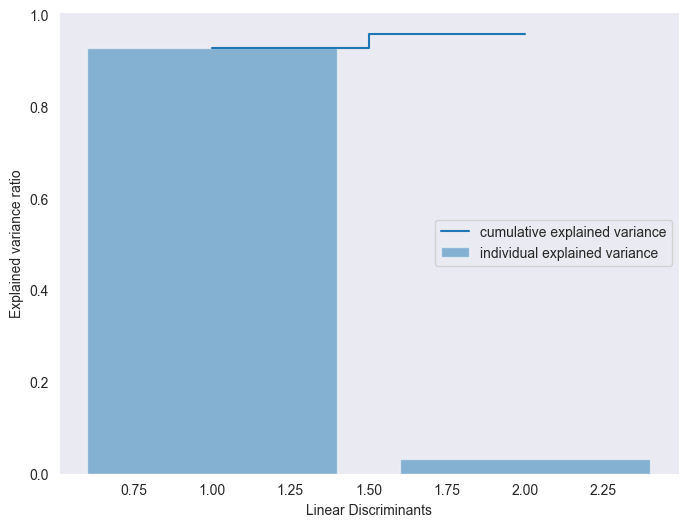

In [27]:
# 2. Cumulative Variance
cumulative_variance = np.cumsum(explained_variance)
print("Cumulative explained variance:\n", cumulative_variance)

# Plot the explained variance ratio and cumulative variance
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Linear Discriminants')
plt.legend(loc='best')
plt.grid(visible=False)
plt.show()

In [28]:
# 3. Principal Component Scores
print("Linear Discriminant Scores (first 5 samples):\n", X_train_lda[:5])

Linear Discriminant Scores (first 5 samples):
 [[ 2.2809871  -0.54673526]
 [-1.36868602  0.7124064 ]
 [ 4.19735577  1.16155298]
 [-2.55436107  0.23225842]
 [ 3.8672565  -0.69489464]]


In [29]:
# 4. Loading Scores
loading_scores = pd.DataFrame(lda.scalings_, index=X.columns, columns=[f'LD{i+1}' for i in range(lda.scalings_.shape[1])])
print("\nLoading scores (contributions of each feature to the linear discriminants):")
print(loading_scores)


Loading scores (contributions of each feature to the linear discriminants):
                    LD1         LD2        LD3        LD4        LD5
Area           8.799593  107.803536  73.856160 -64.587073 -32.620260
Circularity    0.196107   -0.649658  -0.912472  -2.589479   0.188940
ConvexArea    -3.257457    1.661220  -1.797801   2.411834  -4.194517
EquivDiameter -3.737966   -2.499676 -12.985063  -1.139743   0.336261
Extent         0.129833   -1.051578   0.956880  -0.621769  -1.656041
...                 ...         ...        ...        ...        ...
NP3RTCON       0.261700    0.009889   0.161369   0.380831   0.068065
NP3SPCH        0.225875    0.082126  -0.121165   0.030169   0.158776
NP3TTAPL       0.295958    0.004177   0.422682  -0.273965   0.181310
NP3TTAPR       0.181047   -0.071765  -0.057383   0.026761  -0.245716
NHY           -0.207935   -0.225231   0.842729   0.648697  -0.221630

[91 rows x 5 columns]


In [30]:
# 5. Correlation with Original Features
print("\nCorrelation of each feature with the first linear discriminant:")
correlations = loading_scores['LD1']
print(correlations)


Correlation of each feature with the first linear discriminant:
Area             8.799593
Circularity      0.196107
ConvexArea      -3.257457
EquivDiameter   -3.737966
Extent           0.129833
                   ...   
NP3RTCON         0.261700
NP3SPCH          0.225875
NP3TTAPL         0.295958
NP3TTAPR         0.181047
NHY             -0.207935
Name: LD1, Length: 91, dtype: float64


In [31]:
correlations

Area             8.799593
Circularity      0.196107
ConvexArea      -3.257457
EquivDiameter   -3.737966
Extent           0.129833
                   ...   
NP3RTCON         0.261700
NP3SPCH          0.225875
NP3TTAPL         0.295958
NP3TTAPR         0.181047
NHY             -0.207935
Name: LD1, Length: 91, dtype: float64

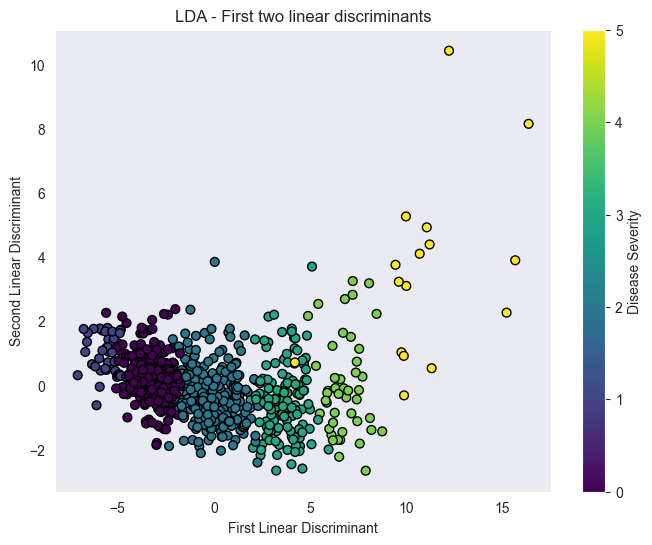

In [32]:
# 6. Visualization

plt.figure(figsize=(8, 6))
plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=40)
plt.xlabel('First Linear Discriminant')
plt.ylabel('Second Linear Discriminant')
plt.title('LDA - First two linear discriminants')
plt.colorbar(label='Disease Severity')
plt.grid(visible=False)
plt.show()


In [33]:

# 7. Noise Reduction
# Let's assume that components with very low explained variance represent noise.
threshold = 0.01  # Variance ratio threshold to determine if a component is considered noise
num_components = np.sum(explained_variance > threshold)
print(f"\nNumber of components to retain to reduce noise: {num_components}")


Number of components to retain to reduce noise: 2


In [34]:
# 8. Feature Importance
most_valuable_features = [np.abs(lda.scalings_[:, i]).argmax() for i in range(lda.scalings_.shape[1])]
most_valuable_features_names = [X.columns[i] for i in most_valuable_features]

print("\nMost valuable features for each linear discriminant:")
for i, feature in enumerate(most_valuable_features_names):
    print(f"Linear Discriminant {i+1}: {feature}")


Most valuable features for each linear discriminant:
Linear Discriminant 1: Shannon_Entropy
Linear Discriminant 2: Area
Linear Discriminant 3: Shannon_Entropy
Linear Discriminant 4: Shannon_Entropy
Linear Discriminant 5: Skewness



Correlation matrix of linear discriminants:
 [[ 1.00000000e+00 -2.04634928e-15]
 [-2.04634928e-15  1.00000000e+00]]


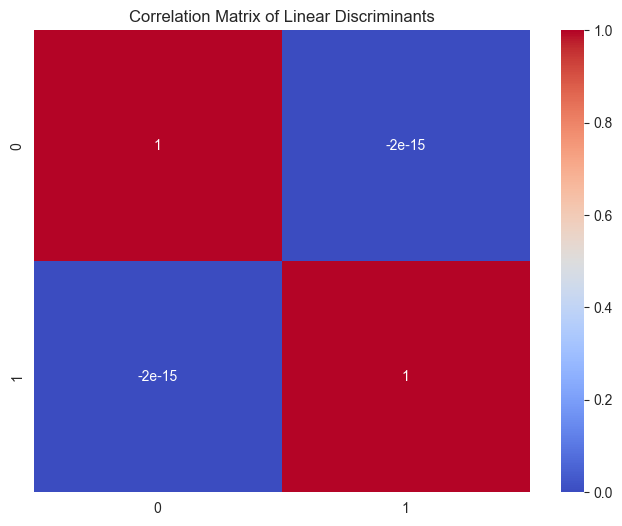

In [35]:
# 9. Multicollinearity
# LDA components are linear combinations, but we can check correlation among them
correlation_matrix = np.corrcoef(X_train_lda.T)
print("\nCorrelation matrix of linear discriminants:\n", correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Linear Discriminants')
plt.show()


In [36]:

# 10. Interpretation
# Interpretation often requires domain knowledge. The features contributing the most to each linear discriminant are the most important.
# These features can help in understanding the separation between classes.
print("\nInterpreting Linear Discriminants:")
for i, feature in enumerate(most_valuable_features_names):
    print(f"Linear Discriminant {i+1} is largely influenced by {feature}.")


Interpreting Linear Discriminants:
Linear Discriminant 1 is largely influenced by Shannon_Entropy.
Linear Discriminant 2 is largely influenced by Area.
Linear Discriminant 3 is largely influenced by Shannon_Entropy.
Linear Discriminant 4 is largely influenced by Shannon_Entropy.
Linear Discriminant 5 is largely influenced by Skewness.


Agglomerative Clustering Silhouette Score: 0.3695
K-Means Clustering Silhouette Score: 0.3725
Agglomerative Clustering ARI: 0.8976
K-Means Clustering ARI: 0.9016
Agglomerative Clustering NMI: 0.8833
K-Means Clustering NMI: 0.8886


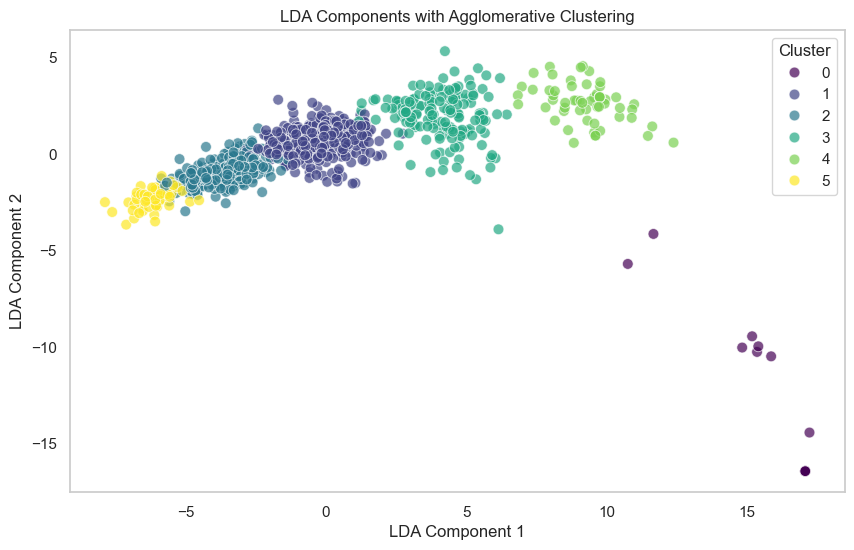

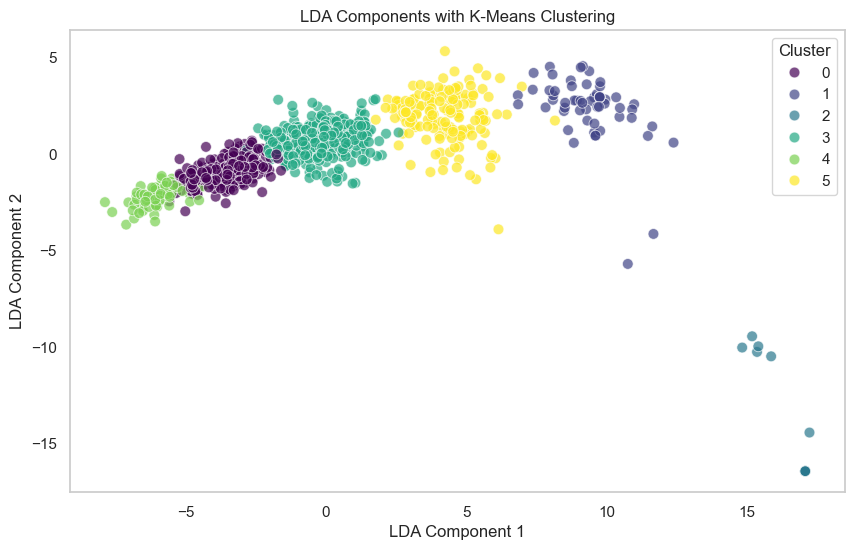

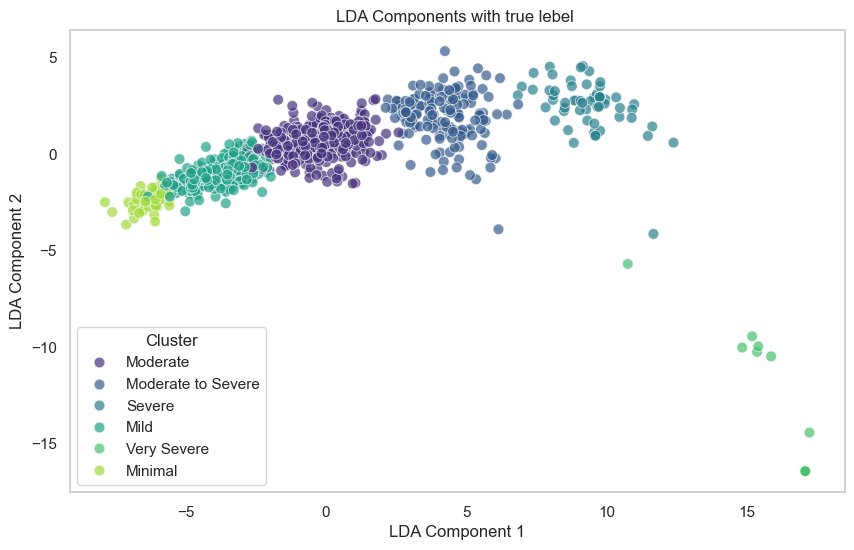

In [71]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("B:/Projects/PycharmProjects/PPMI_Research_on_Parkinson's/src/mahbub/finalDatasetWithUPDRSScore.csv")

# Define non-feature, numerical, and categorical columns
non_feature_columns = ['Patient ID', 'Visit Date', 'UPDRS_SCORE', 'Visit']
numerical_features = [
    'Area', 'Circularity', 'ConvexArea', 'EquivDiameter', 'Extent',
    'FilledArea', 'Kurtosis', 'Major axis length', 'Mean',
    'Minor axis length', 'PA_ratio', 'Shannon_Entropy', 'Skewness',
    'Solidity', 'Standard Deviation', 'brightness', 'contrast',
    'correlation', 'dissimilarity', 'energy', 'gabor_energy',
    'gabor_entropy', 'homogeneity', 'lbp_energy', 'lbp_entropy',
    'DATSCAN_CAUDATE_R', 'DATSCAN_CAUDATE_L', 'DATSCAN_PUTAMEN_R',
    'DATSCAN_PUTAMEN_L', 'DATSCAN_PUTAMEN_R_ANT', 'DATSCAN_PUTAMEN_L_ANT'
]
categorical_features = [
    'NP1ANXS', 'NP1APAT', 'NP1COG', 'NP1DDS', 'NP1DPRS',
    'NP1HALL', 'NP1CNST', 'NP1FATG', 'NP1LTHD', 'NP1PAIN', 'NP1SLPD',
    'NP1SLPN', 'NP1URIN', 'NP2DRES', 'NP2EAT', 'NP2FREZ', 'NP2HOBB',
    'NP2HWRT', 'NP2HYGN', 'NP2RISE', 'NP2SALV', 'NP2SPCH', 'NP2SWAL',
    'NP2TRMR', 'NP2TURN', 'NP2WALK', 'NP3BRADY', 'NP3FACXP', 'NP3FRZGT',
    'NP3FTAPL', 'NP3FTAPR', 'NP3GAIT', 'NP3HMOVL', 'NP3HMOVR', 'NP3KTRML',
    'NP3KTRMR', 'NP3LGAGL', 'NP3LGAGR', 'NP3POSTR', 'NP3PRSPL', 'NP3PRSPR',
    'NP3PSTBL', 'NP3PTRML', 'NP3PTRMR', 'NP3RIGLL', 'NP3RIGLU', 'NP3RIGN',
    'NP3RIGRL', 'NP3RIGRU', 'NP3RISNG', 'NP3RTALJ', 'NP3RTALL', 'NP3RTALU',
    'NP3RTARL', 'NP3RTARU', 'NP3RTCON', 'NP3SPCH', 'NP3TTAPL', 'NP3TTAPR',
    'NHY'
]
target_column = "Disease_Severity"

# Step 1: Store original numerical data before scaling
original_data = data[numerical_features].copy()

# Step 2: Apply MinMax scaling to the data (for later use)
scaler = MinMaxScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Split data into X (features) and y (target)
X = data[numerical_features + categorical_features]
y = data[target_column]

# Encode categorical features
X = pd.get_dummies(X, columns=categorical_features)

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Apply LDA for Dimensionality Reduction
lda = LDA(n_components=5)  # Reduce to 2 dimensions for visualization
X_lda = lda.fit_transform(X, y)
n_clusters = len(np.unique(y))
# Perform Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
agg_clusters = agg_clustering.fit_predict(X_lda)

# Perform K-Means Clustering

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_clusters = kmeans.fit_predict(X_lda)

# Evaluate Clustering Results
agg_silhouette_avg = silhouette_score(X_lda, agg_clusters)
kmeans_silhouette_avg = silhouette_score(X_lda, kmeans_clusters)
print(f'Agglomerative Clustering Silhouette Score: {agg_silhouette_avg:.4f}')
print(f'K-Means Clustering Silhouette Score: {kmeans_silhouette_avg:.4f}')

# Calculate ARI and NMI
agg_ari = adjusted_rand_score(y, agg_clusters)
kmeans_ari = adjusted_rand_score(y, kmeans_clusters)
agg_nmi = normalized_mutual_info_score(y, agg_clusters)
kmeans_nmi = normalized_mutual_info_score(y, kmeans_clusters)

print(f'Agglomerative Clustering ARI: {agg_ari:.4f}')
print(f'K-Means Clustering ARI: {kmeans_ari:.4f}')
print(f'Agglomerative Clustering NMI: {agg_nmi:.4f}')
print(f'K-Means Clustering NMI: {kmeans_nmi:.4f}')

# Visualization Function
def plot_clustering_results(X_lda, clusters, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X_lda[:, 0], y=X_lda[:, 1], hue=clusters, palette='viridis', s=60, alpha=0.7)
    plt.title(title)
    plt.xlabel('LDA Component 1')
    plt.ylabel('LDA Component 2')
    plt.grid(visible=False)
    plt.legend(title='Cluster')
    plt.show()

# Visualize LDA results with Agglomerative Clustering
plot_clustering_results(X_lda, agg_clusters, 'LDA Components with Agglomerative Clustering')

# Visualize LDA results with K-Means Clustering
plot_clustering_results(X_lda, kmeans_clusters, 'LDA Components with K-Means Clustering')
# Visualize LDA results with Agglomerative Clustering
y_original = le.inverse_transform(y)
# Visualize LDA results with K-Means Clustering
plot_clustering_results(X_lda, y_original, 'LDA Components with true lebel ')


In [72]:
import pandas as pd
from scipy.stats import ttest_ind
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv("B:/Projects/PycharmProjects/PPMI_Research_on_Parkinson's/src/mahbub/finalDatasetWithUPDRSScore.csv")

# Define feature sets
features_random_forest = [
    'NP3POSTR', 'DATSCAN_PUTAMEN_R', 'NP2DRES', 'NP3RIGN', 'NHY',
    'NP2HOBB', 'DATSCAN_CAUDATE_R', 'DATSCAN_CAUDATE_L', 'DATSCAN_PUTAMEN_L_ANT',
    'NP2TURN', 'DATSCAN_PUTAMEN_R_ANT', 'Shannon_Entropy', 'NP3BRADY',
    'NP3LGAGR', 'DATSCAN_PUTAMEN_L', 'Circularity', 'correlation',
    'NP3HMOVR', 'Major axis length', 'NP3TTAPL'
]

features_rfe = [
    'NP1ANXS', 'NP1PAIN', 'NP1SLPD', 'NP2DRES', 'NP2EAT',
    'NP2HOBB', 'NP2RISE', 'NP2SPCH', 'NP2WALK', 'NP3FACXP',
    'NP3FTAPL', 'NP3FTAPR', 'NP3LGAGR', 'NP3POSTR', 'NP3PRSPL',
    'NP3PTRML', 'NP3RIGRU', 'NP3RISNG', 'NP3RTCON', 'NP3TTAPL'
]

features_lasso = [
    'DATSCAN_PUTAMEN_R_ANT', 'Shannon_Entropy', 'NP3RIGN', 'NP1URIN',
    'DATSCAN_PUTAMEN_L_ANT', 'NP3RISNG', 'NP3LGAGL', 'NP3PRSPL',
    'NP3TTAPR', 'NP1PAIN', 'NP3RIGRL', 'NP2SPCH', 'NP3POSTR',
    'NP2HWRT', 'NP1FATG', 'NP3RTCON', 'NP3RTALL', 'NP1DPRS',
    'NP2HOBB', 'NP3RIGLU'
]

features_mutual_info = [
    'NHY', 'NP2DRES', 'NP3BRADY', 'NP2HOBB', 'NP3POSTR',
    'NP2RISE', 'NP2EAT', 'NP3RIGN', 'NP3FACXP', 'NP3TTAPR',
    'NP3TTAPL', 'NP3SPCH', 'NP2WALK', 'NP3RIGRU', 'NP2HYGN',
    'NP3HMOVL', 'NP3RIGLU', 'NP3FTAPL', 'NP2SPCH', 'NP3RISNG'
]

# Define visit pairs and severity levels
visit_pairs = [('V1', 'V2'), ('V1', 'V3'), ('V1', 'V4'), ('V2', 'V3'), ('V2', 'V4'), ('V3', 'V4')]
severity_levels = data['Disease_Severity'].unique()

# Function to perform t-tests and return DataFrame of p-values
def perform_ttests(features, visit_pairs, severity_levels):
    pairwise_p_values_visits = {}
    pairwise_p_values_severity = {}

    # T-Test Across Visits
    for feature in features:
        feature_p_values_visits = {}
        for v1, v2 in visit_pairs:
            data_v1 = data[data['Visit'] == v1][feature].dropna()
            data_v2 = data[data['Visit'] == v2][feature].dropna()

            if len(data_v1) > 1 and len(data_v2) > 1:  
                t_stat, p_value = ttest_ind(data_v1, data_v2, nan_policy='omit')
                feature_p_values_visits[f"{v1}_{v2}"] = p_value
            else:
                feature_p_values_visits[f"{v1}_{v2}"] = np.nan  

        pairwise_p_values_visits[feature] = feature_p_values_visits

    # Convert results for visits to DataFrame
    pairwise_p_values_visits_df = pd.DataFrame(pairwise_p_values_visits).T

    # T-Test Across Disease Severity
    for feature in features:
        feature_p_values_severity = {}
        for severity1 in severity_levels:
            for severity2 in severity_levels:
                if severity1 != severity2:
                    data_severity1 = data[data['Disease_Severity'] == severity1][feature].dropna()
                    data_severity2 = data[data['Disease_Severity'] == severity2][feature].dropna()

                    if len(data_severity1) > 1 and len(data_severity2) > 1:  
                        t_stat, p_value = ttest_ind(data_severity1, data_severity2, nan_policy='omit')
                        feature_p_values_severity[f"{severity1}_{severity2}"] = p_value
                    else:
                        feature_p_values_severity[f"{severity1}_{severity2}"] = np.nan  

        pairwise_p_values_severity[feature] = feature_p_values_severity

    # Convert results for severity to DataFrame
    pairwise_p_values_severity_df = pd.DataFrame(pairwise_p_values_severity).T

    return pairwise_p_values_visits_df, pairwise_p_values_severity_df

# Perform t-tests for each feature set
rf_visits, rf_severity = perform_ttests(features_random_forest, visit_pairs, severity_levels)
rfe_visits, rfe_severity = perform_ttests(features_rfe, visit_pairs, severity_levels)
lasso_visits, lasso_severity = perform_ttests(features_lasso, visit_pairs, severity_levels)
mi_visits, mi_severity = perform_ttests(features_mutual_info, visit_pairs, severity_levels)

# Save results to CSV
rf_visits.to_csv("rf_pairwise_p_values_visits.csv")
rf_severity.to_csv("rf_pairwise_p_values_severity.csv")
rfe_visits.to_csv("rfe_pairwise_p_values_visits.csv")
rfe_severity.to_csv("rfe_pairwise_p_values_severity.csv")
lasso_visits.to_csv("lasso_pairwise_p_values_visits.csv")
lasso_severity.to_csv("lasso_pairwise_p_values_severity.csv")
mi_visits.to_csv("mi_pairwise_p_values_visits.csv")
mi_severity.to_csv("mi_pairwise_p_values_severity.csv")

# Print results
print("Random Forest Pairwise p-values across visits:")
print(rf_visits)
print("Random Forest Pairwise p-values across severity:")
print(rf_severity)

print("RFE Pairwise p-values across visits:")
print(rfe_visits)
print("RFE Pairwise p-values across severity:")
print(rfe_severity)

print("Lasso Pairwise p-values across visits:")
print(lasso_visits)
print("Lasso Pairwise p-values across severity:")
print(lasso_severity)

print("Mutual Information Pairwise p-values across visits:")
print(mi_visits)
print("Mutual Information Pairwise p-values across severity:")
print(mi_severity)

# Visualization for each feature set
def plot_heatmap(p_values_df, title):
    plt.figure(figsize=(12, 10))
    sns.heatmap(p_values_df, annot=True, cmap="coolwarm", fmt=".4f", linewidths=0.5)
    plt.title(title)
    plt.show()

# # Plotting heatmaps for each feature set
# plot_heatmap(rf_visits, "Random Forest Pairwise p-values Across Visits")
# plot_heatmap(rf_severity, "Random Forest Pairwise p-values Across Severity")
# plot_heatmap(rfe_visits, "RFE Pairwise p-values Across Visits")
# plot_heatmap(rfe_severity, "RFE Pairwise p-values Across Severity")
# plot_heatmap(lasso_visits, "Lasso Pairwise p-values Across Visits")
# plot_heatmap(lasso_severity, "Lasso Pairwise p-values Across Severity")
# plot_heatmap(mi_visits, "Mutual Information Pairwise p-values Across Visits")
# plot_heatmap(mi_severity, "Mutual Information Pairwise p-values Across Severity")


Random Forest Pairwise p-values across visits:
                          V1_V2         V1_V3         V1_V4     V2_V3  \
NP3POSTR               0.019759  6.926669e-03  1.411986e-05  0.710778   
DATSCAN_PUTAMEN_R      0.000213  2.686179e-07  1.742268e-20  0.154249   
NP2DRES                0.003962  1.748113e-03  2.455721e-10  0.774858   
NP3RIGN                0.110216  5.580337e-03  1.086034e-04  0.209638   
NHY                    0.000036  1.627768e-06  1.765979e-17  0.449165   
NP2HOBB                0.030833  7.513231e-03  5.886831e-08  0.628853   
DATSCAN_CAUDATE_R      0.000425  1.596725e-07  4.189019e-19  0.056051   
DATSCAN_CAUDATE_L      0.000190  9.119688e-08  1.582917e-20  0.079695   
DATSCAN_PUTAMEN_L_ANT  0.000110  4.752675e-08  1.364118e-22  0.064677   
NP2TURN                0.000039  7.840496e-04  2.831086e-13  0.489945   
DATSCAN_PUTAMEN_R_ANT  0.000023  1.123072e-08  2.120918e-23  0.139817   
Shannon_Entropy        0.420556  3.162629e-01  7.021595e-02  0.766218   
NP3B

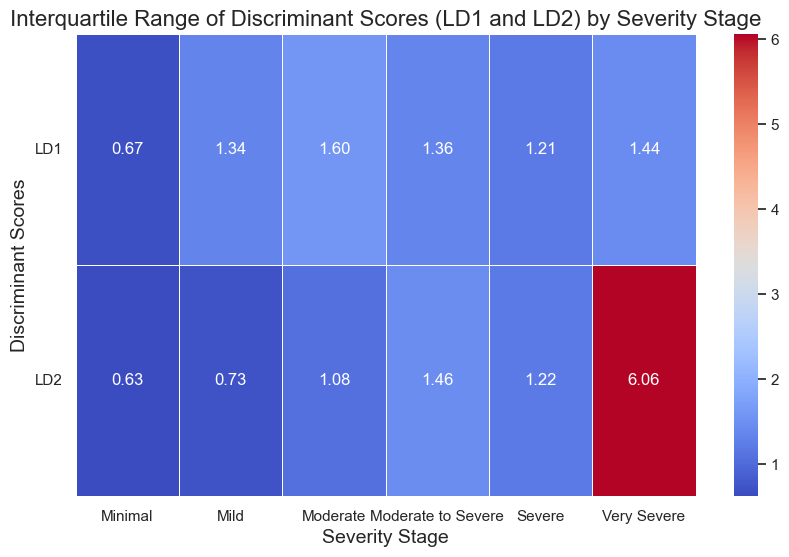

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the LDA scores and severity data
scores_df = pd.DataFrame(X_lda, columns=['LD1', 'LD2', 'LD3', 'LD4', 'LD5'])
scores_df['Severity'] = y_original

# Define the correct order of severity levels
correct_order = ['Minimal', 'Mild', 'Moderate', 'Moderate to Severe', 'Severe', 'Very Severe']

# Calculate the Q1 and Q3 for LD1 and LD2 for each severity level
q1_scores = scores_df.groupby('Severity')[['LD1', 'LD2']].quantile(0.25)
q3_scores = scores_df.groupby('Severity')[['LD1', 'LD2']].quantile(0.75)

# Create a DataFrame to hold IQR values
iqr_scores = q3_scores - q1_scores

# Reorder the index according to the correct order of severity levels
iqr_scores = iqr_scores.reindex(correct_order)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(iqr_scores.T, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Interquartile Range of Discriminant Scores (LD1 and LD2) by Severity Stage', fontsize=16)
plt.ylabel('Discriminant Scores', fontsize=14)
plt.xlabel('Severity Stage', fontsize=14)
plt.yticks(rotation=0)  # Keep the y-ticks horizontal for better readability
plt.show()


C:\Users\bubha\AppData\Local\Temp\ipykernel_13028\3240060977.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(x='Severity', y='LD1', data=scores_df, order=correct_order, palette='pastel', showfliers=False)


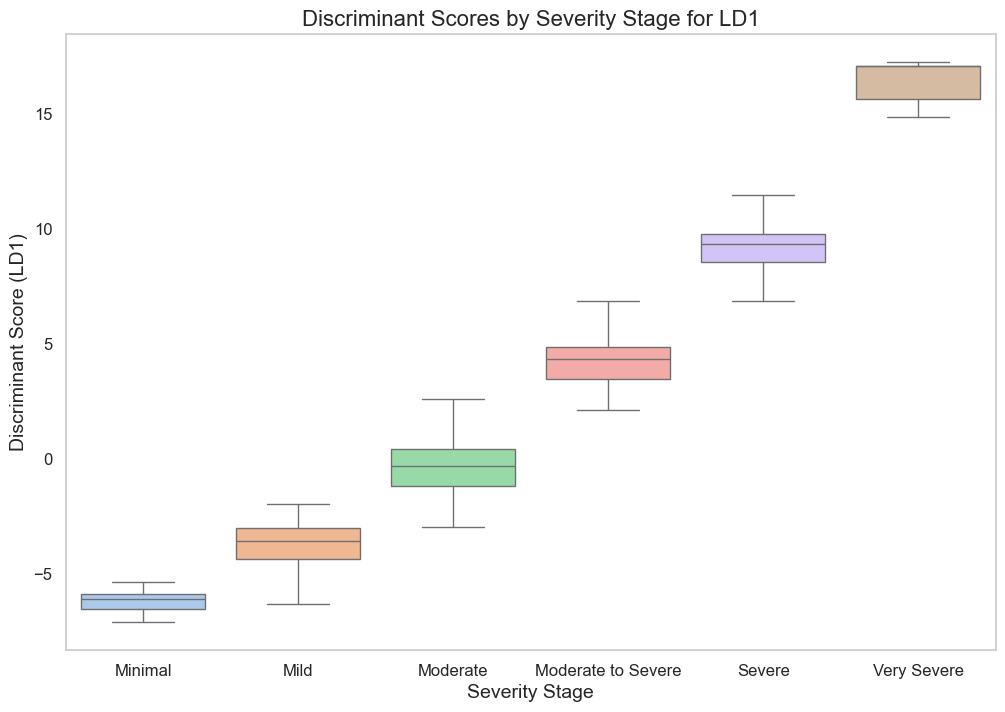

In [74]:
# Assuming you have the LDA scores
scores_df = pd.DataFrame(X_lda, columns=['LD1', 'LD2', 'LD3', 'LD4', 'LDA5'])
scores_df['Severity'] = y_original

# Define the correct order of severity levels
correct_order = ['Minimal', 'Mild', 'Moderate', 'Moderate to Severe', 'Severe', 'Very Severe']

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")  # Set the style for the plot

# Create the boxplot without outliers
boxplot = sns.boxplot(x='Severity', y='LD1', data=scores_df, order=correct_order, palette='pastel', showfliers=False)

# Enhance the plot
boxplot.set_title('Discriminant Scores by Severity Stage for LD1', fontsize=16)
boxplot.set_xlabel('Severity Stage', fontsize=14)
boxplot.set_ylabel('Discriminant Score (LD1)', fontsize=14)  # Changed to LD1 for consistency

# Increase font size for x and y ticks
boxplot.tick_params(axis='both', labelsize=12)

# Optionally, add gridlines for better readability
plt.grid(visible=False)

plt.show()


C:\Users\bubha\AppData\Local\Temp\ipykernel_13028\4195717554.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(x='Severity', y='LD2', data=scores_df, order=correct_order, palette='pastel', showfliers=False)


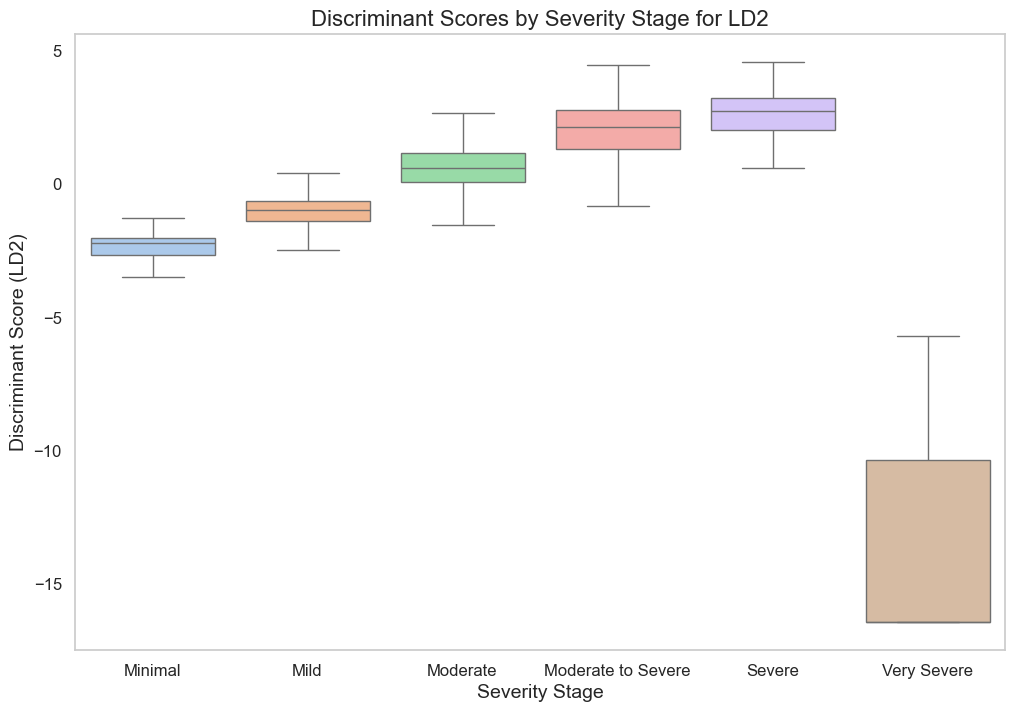

In [75]:
# Assuming you have the LDA scores
scores_df = pd.DataFrame(X_lda, columns=['LD1', 'LD2', 'LD3', 'LD4', 'LDA5'])
scores_df['Severity'] = y_original

# Define the correct order of severity levels
correct_order = ['Minimal', 'Mild', 'Moderate', 'Moderate to Severe', 'Severe', 'Very Severe']

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")  # Set the style for the plot

# Create the boxplot without outliers
boxplot = sns.boxplot(x='Severity', y='LD2', data=scores_df, order=correct_order, palette='pastel', showfliers=False)

# Enhance the plot
boxplot.set_title('Discriminant Scores by Severity Stage for LD2', fontsize=16)
boxplot.set_xlabel('Severity Stage', fontsize=14)
boxplot.set_ylabel('Discriminant Score (LD2)', fontsize=14)  # Changed to LD1 for consistency

# Increase font size for x and y ticks
boxplot.tick_params(axis='both', labelsize=12)

# Optionally, add gridlines for better readability
plt.grid(visible=False)

plt.show()


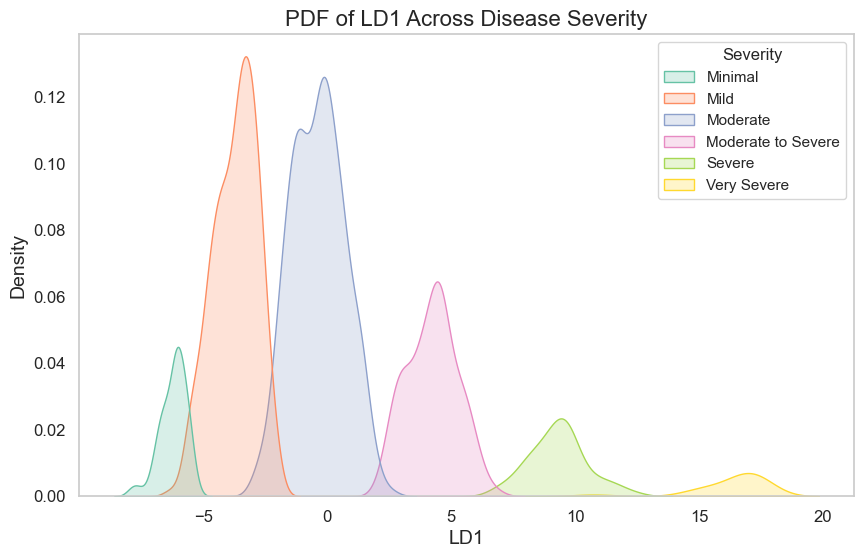

In [76]:
# Define the correct order of severity levels
correct_order = ['Minimal', 'Mild', 'Moderate', 'Moderate to Severe', 'Severe', 'Very Severe']

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")  # Set the style for the plot

# Plot the KDE (PDF) for LD1 across different disease severity stages
sns.kdeplot(data=scores_df, x='LD1', hue='Severity', hue_order=correct_order, fill=True, palette='Set2')

# Enhance the plot
plt.title('PDF of LD1 Across Disease Severity', fontsize=16)
plt.xlabel('LD1', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Increase font size for x and y ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(visible=False)
plt.show()


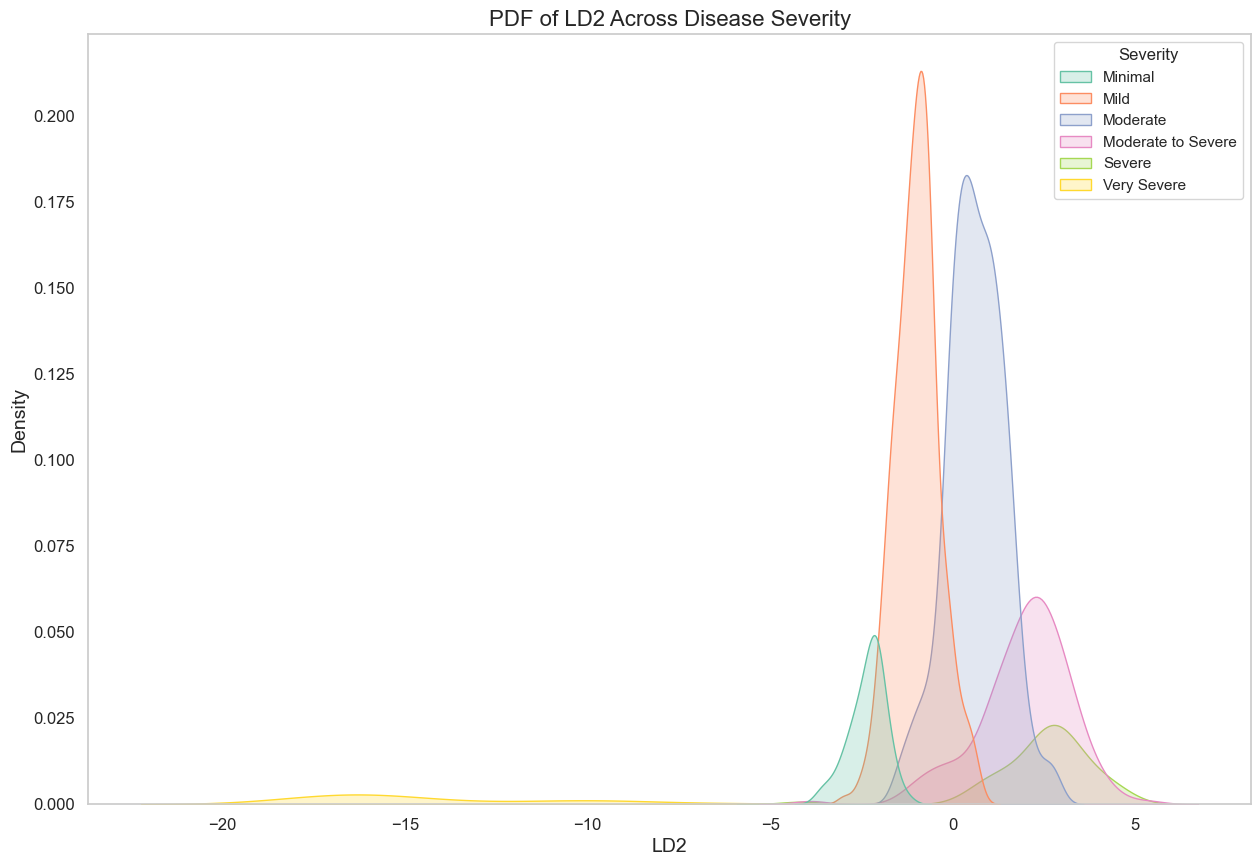

In [77]:
# Define the correct order of severity levels
correct_order = ['Minimal', 'Mild', 'Moderate', 'Moderate to Severe', 'Severe', 'Very Severe']

plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")  # Set the style for the plot

# Plot the KDE (PDF) for LD2 across different disease severity stages
sns.kdeplot(data=scores_df, x='LD2', hue='Severity', hue_order=correct_order, fill=True, palette='Set2')

# Enhance the plot
plt.title('PDF of LD2 Across Disease Severity', fontsize=16)
plt.xlabel('LD2', fontsize=14)  # Changed LD1 to LD2 for consistency with the plot
plt.ylabel('Density', fontsize=14)

# Increase font size for x and y ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Position the legend in the top-left corner

# Add grid lines for better readability
plt.grid(visible=False)

plt.show()


In [78]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Prepare data for ANOVA test on LD1 across visits
anova_data_visit = pd.DataFrame({'LD2': X_lda[:, 0], 'Visit': data['Visit']})

# Fit the model for ANOVA
model = ols('LD2 ~ C(Visit)', data=anova_data_visit).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Display ANOVA results
print("ANOVA Results for LD2 Across Visits")
print(anova_table)


ANOVA Results for LD2 Across Visits
                sum_sq     df          F        PR(>F)
C(Visit)   1487.221002    3.0  24.695942  2.294043e-15
Residual  18226.971264  908.0        NaN           NaN


In [79]:
kruskal_result = stats.kruskal(*[anova_data_visit['LD2'][anova_data_visit['Visit'] == severity]
                                  for severity in correct_order])

print("Kruskal-Wallis Test for LD2 Across Disease Severity:")
print(kruskal_result)

Kruskal-Wallis Test for LD2 Across Disease Severity:
KruskalResult(statistic=nan, pvalue=nan)


In [84]:
# Prepare data for ANOVA test on LD1 across disease severity
anova_data_severity = pd.DataFrame({'LD1': X_lda[:, 1], 'Severity': y_original})

# Fit the model for ANOVA
model = ols('LD1 ~ C(Severity)', data=anova_data_severity).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Display ANOVA results
print("ANOVA Results for LD1 Across Disease Severity")
print(anova_table)


ANOVA Results for LD1 Across Disease Severity
                  sum_sq     df            F  PR(>F)
C(Severity)  5417.413956    5.0  1083.482791     0.0
Residual      906.000000  906.0          NaN     NaN


In [85]:
# Perform Kruskal-Wallis test for LD1 across Disease Severity
kruskal_result = stats.kruskal(*[anova_data_severity['LD1'][anova_data_severity['Severity'] == severity]
                                  for severity in correct_order])

print("Kruskal-Wallis Test for LD1 Across Disease Severity:")
print(kruskal_result)


Kruskal-Wallis Test for LD1 Across Disease Severity:
KruskalResult(statistic=669.7723737929863, pvalue=1.684342564872458e-142)


In [86]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD test after ANOVA for Disease Severity
tukey = pairwise_tukeyhsd(endog=anova_data_severity['LD1'], groups=anova_data_severity['Severity'], alpha=0.05)

# Display Tukey HSD results
print(tukey)


             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
      group1             group2       meandiff p-adj   lower    upper   reject
------------------------------------------------------------------------------
              Mild            Minimal  -1.3538    0.0  -1.7815  -0.9261   True
              Mild           Moderate   1.6076    0.0   1.3782   1.8369   True
              Mild Moderate to Severe   2.9312    0.0   2.6454   3.2169   True
              Mild             Severe     3.51    0.0   3.0981   3.9218   True
              Mild        Very Severe -13.0899    0.0 -13.7669 -12.4129   True
           Minimal           Moderate   2.9613    0.0   2.5401   3.3826   True
           Minimal Moderate to Severe   4.2849    0.0   3.8305   4.7394   True
           Minimal             Severe   4.8638    0.0   4.3211   5.4064   True
           Minimal        Very Severe -11.7361    0.0 -12.4997 -10.9725   True
          Moderate Moderate to Severe   1.3236    0.

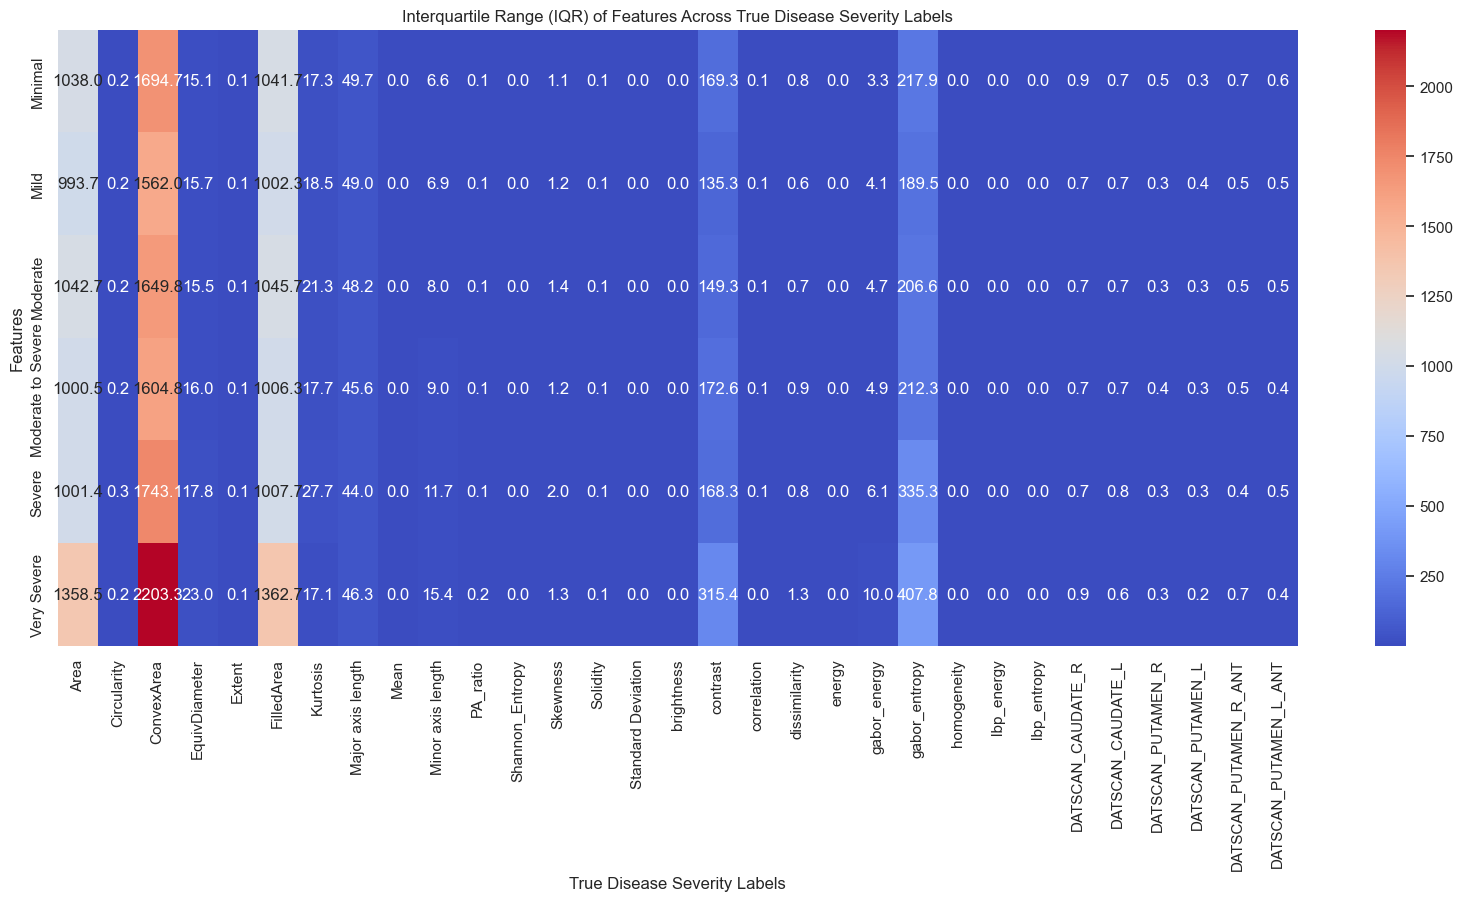

In [52]:
# Define a function to calculate IQR using the original unscaled data
def calculate_iqr(group):
    q1 = group.quantile(0.25)  # 25th percentile
    q3 = group.quantile(0.75)  # 75th percentile
    iqr = q3 - q1
    return pd.DataFrame({'Q1': q1, 'Q3': q3, 'IQR': iqr})

# Initialize dictionary to store IQR results for the true labels (y)
iqr_results_true_labels = {}

# Calculate IQR for each true disease severity label
for label in np.unique(y):
    label_data = original_data[y == label]
    iqr_results_true_labels[label] = calculate_iqr(label_data)

# Convert the results into a DataFrame
iqr_df_true_labels = pd.concat(iqr_results_true_labels, axis=1)

# Extract only the IQR values for visualization
iqr_values_true_labels = iqr_df_true_labels.xs('IQR', level=1, axis=1)

# Replace the numerical labels with actual severity labels using the label encoder
iqr_values_true_labels.columns = le.inverse_transform(iqr_values_true_labels.columns)

# Define the correct order of disease severity labels
correct_order = ['Minimal', 'Mild', 'Moderate', 'Moderate to Severe', 'Severe', 'Very Severe']

# Reorder the columns based on the correct disease severity order
iqr_values_true_labels = iqr_values_true_labels[correct_order]

# Visualize the IQR values for true labels (disease severity) in the correct order
plt.figure(figsize=(20, 8))
sns.heatmap(iqr_values_true_labels.T, cmap='coolwarm', annot=True, fmt=".1f")
plt.title('Interquartile Range (IQR) of Features Across True Disease Severity Labels')
plt.xlabel('True Disease Severity Labels')
plt.ylabel('Features')
plt.show()


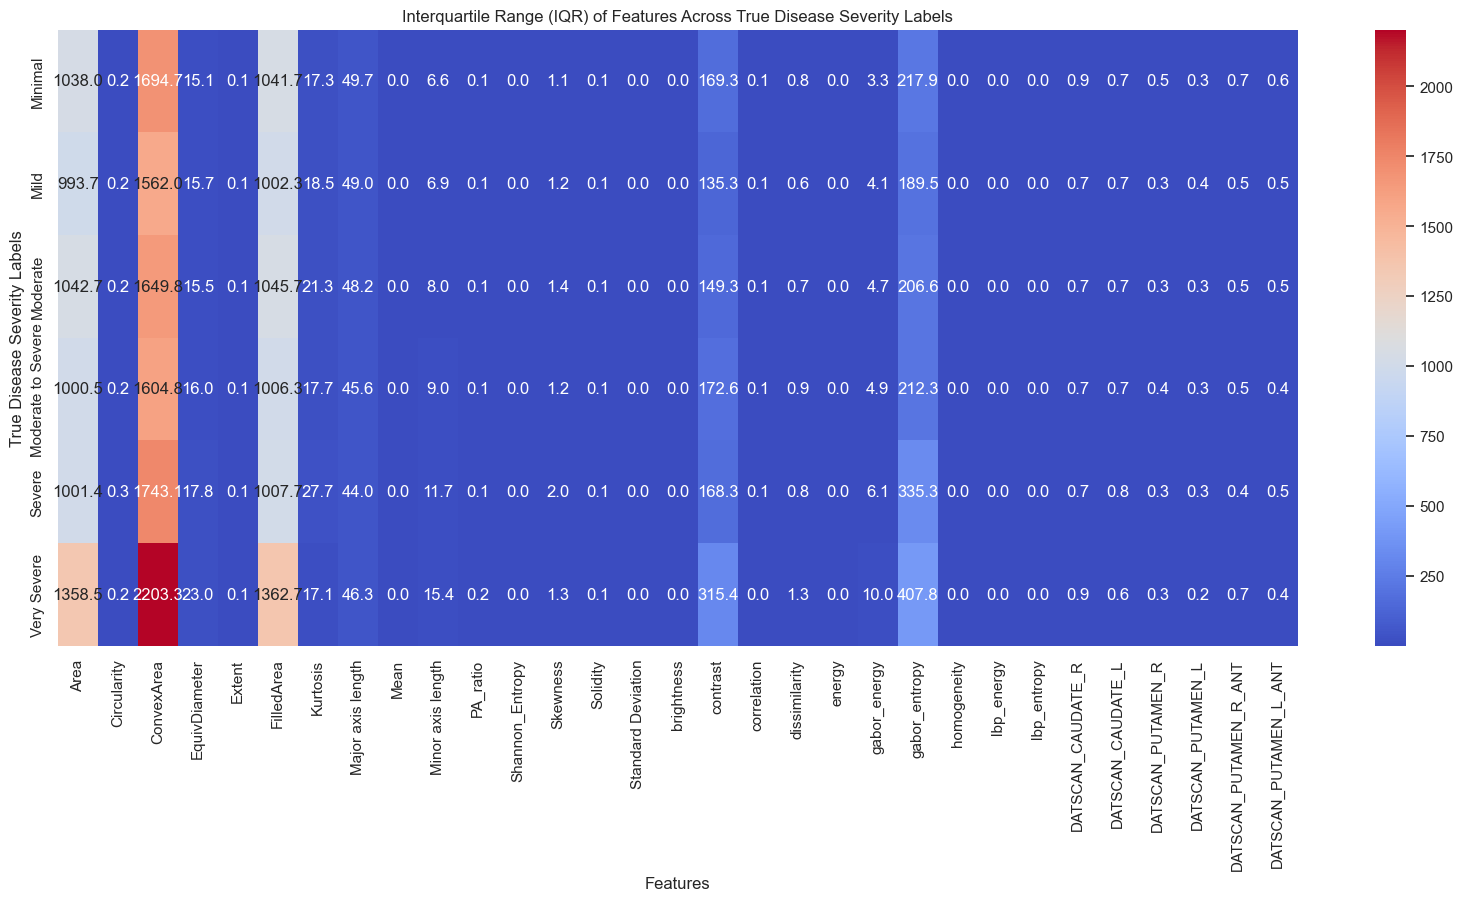

In [53]:
# Function to calculate the interquartile range (IQR) for each feature
def calculate_iqr(group):
    q1 = group.quantile(0.25)  # 25th percentile
    q3 = group.quantile(0.75)  # 75th percentile
    iqr = q3 - q1
    return pd.DataFrame({'Q1': q1, 'Q3': q3, 'IQR': iqr})

# Initialize dictionary to store IQR results for true labels
iqr_results_true_labels = {}

# Loop through each true label and calculate IQR for each label's features
for label in np.unique(y):
    label_data = data[y == label][numerical_features]  # Group by true labels
    iqr_results_true_labels[label] = calculate_iqr(label_data)

# Convert the results into a DataFrame
iqr_df_true_labels = pd.concat(iqr_results_true_labels, axis=1)

# Extract only the IQR values for visualization
iqr_values_true_labels = iqr_df_true_labels.xs('IQR', level=1, axis=1)

# Replace the numerical labels with actual severity labels using the label encoder
iqr_values_true_labels.columns = le.inverse_transform(iqr_values_true_labels.columns)

# Define the correct order of disease severity labels
correct_order = ['Minimal', 'Mild', 'Moderate', 'Moderate to Severe', 'Severe', 'Very Severe']

# Reorder the columns based on the correct disease severity order
iqr_values_true_labels = iqr_values_true_labels[correct_order]

# Visualize the IQR values for true labels (disease severity) in the correct order
plt.figure(figsize=(20, 8))
sns.heatmap(iqr_values_true_labels.T, cmap='coolwarm', annot=True, fmt=".1f")
plt.title('Interquartile Range (IQR) of Features Across True Disease Severity Labels')
plt.ylabel('True Disease Severity Labels')
plt.xlabel('Features')
plt.show()


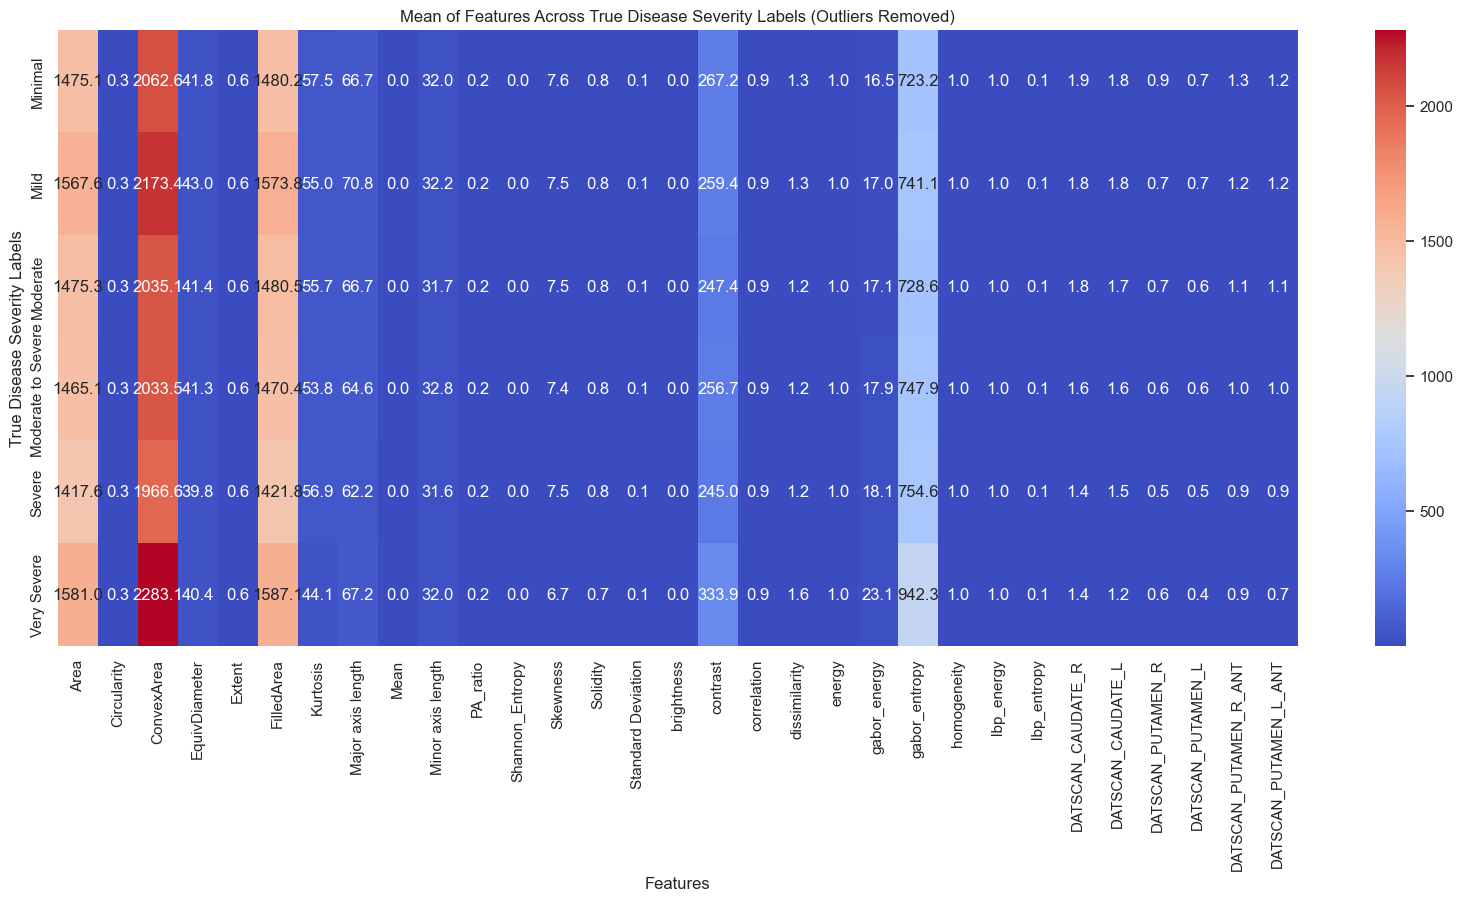

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to remove outliers using IQR
def remove_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Calculate mean for each true disease severity label after removing outliers
mean_results_true_labels = {}

for label in np.unique(y):
    label_data = original_data[y == label]
    
    # Remove outliers
    filtered_data = remove_outliers_iqr(label_data)
    
    mean_results_true_labels[label] = filtered_data.mean()

# Convert the results into a DataFrame
mean_df_true_labels = pd.DataFrame(mean_results_true_labels)

# Replace the numerical labels with actual severity labels using the label encoder
mean_df_true_labels.columns = le.inverse_transform(mean_df_true_labels.columns)

# Define the correct order of disease severity labels
correct_order = ['Minimal', 'Mild', 'Moderate', 'Moderate to Severe', 'Severe', 'Very Severe']

# Reorder the columns based on the correct disease severity order
mean_df_true_labels = mean_df_true_labels[correct_order]

# Visualize the mean values for true labels (disease severity)
plt.figure(figsize=(20, 8))
sns.heatmap(mean_df_true_labels.T, cmap='coolwarm', annot=True, fmt=".1f")
plt.title('Mean of Features Across True Disease Severity Labels (Outliers Removed)')
plt.ylabel('True Disease Severity Labels')
plt.xlabel('Features')
plt.show()


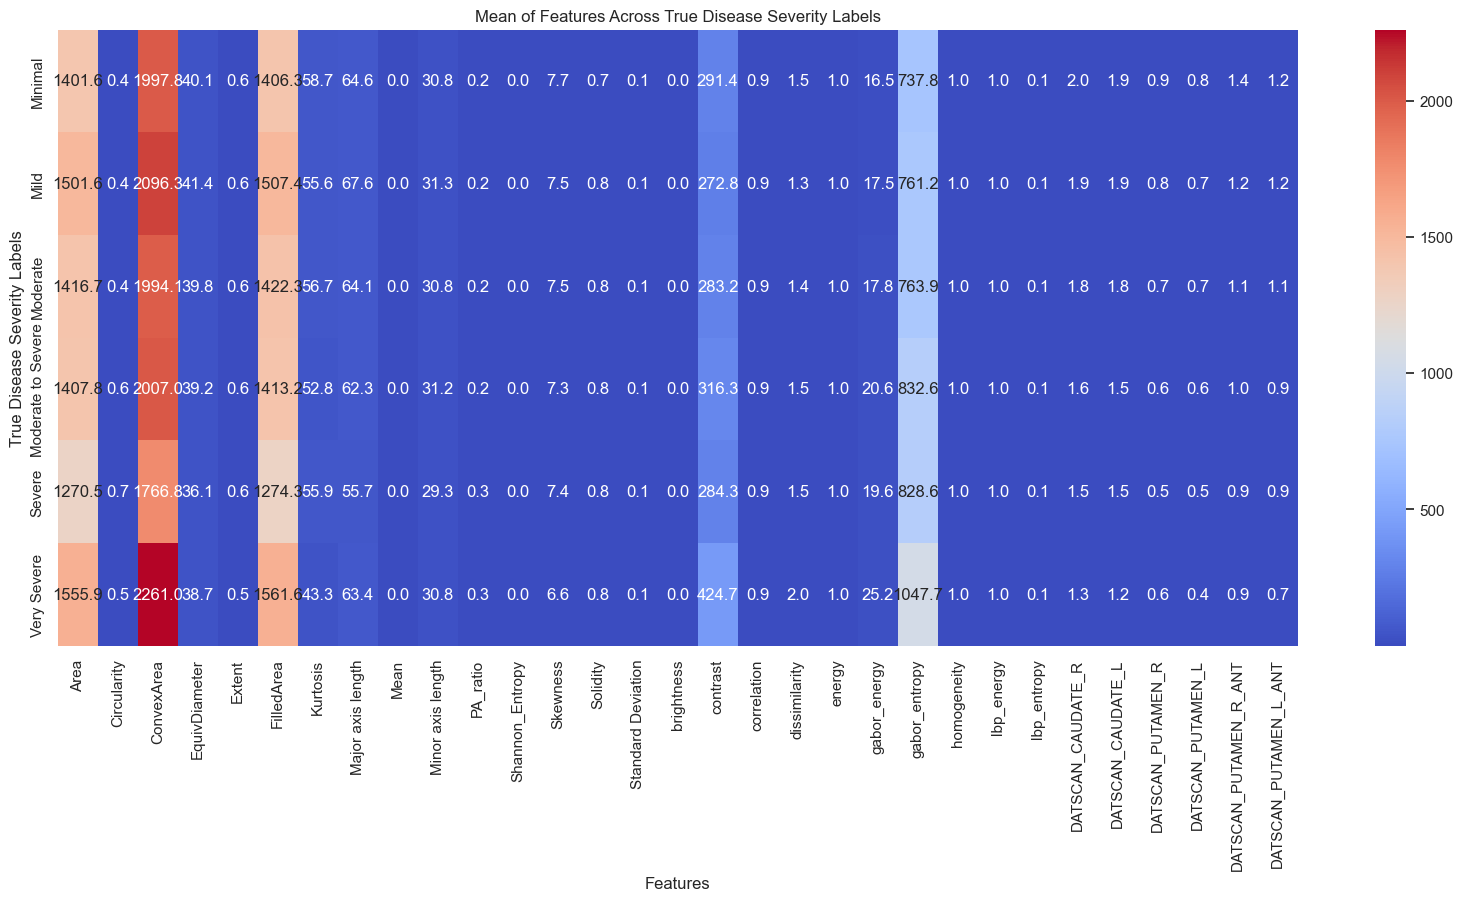

In [55]:
# Calculate mean for each true disease severity label
mean_results_true_labels = {}

for label in np.unique(y):
    label_data = original_data[y == label]
    mean_results_true_labels[label] = label_data.mean()

# Convert the results into a DataFrame
mean_df_true_labels = pd.DataFrame(mean_results_true_labels)

# Replace the numerical labels with actual severity labels using the label encoder
mean_df_true_labels.columns = le.inverse_transform(mean_df_true_labels.columns)

# Define the correct order of disease severity labels
correct_order = ['Minimal', 'Mild', 'Moderate', 'Moderate to Severe', 'Severe', 'Very Severe']

# Reorder the columns based on the correct disease severity order
mean_df_true_labels = mean_df_true_labels[correct_order]

# Visualize the mean values for true labels (disease severity)
plt.figure(figsize=(20, 8))
sns.heatmap(mean_df_true_labels.T, cmap='coolwarm', annot=True, fmt=".1f")
plt.title('Mean of Features Across True Disease Severity Labels')
plt.ylabel('True Disease Severity Labels')
plt.xlabel('Features')
plt.show()


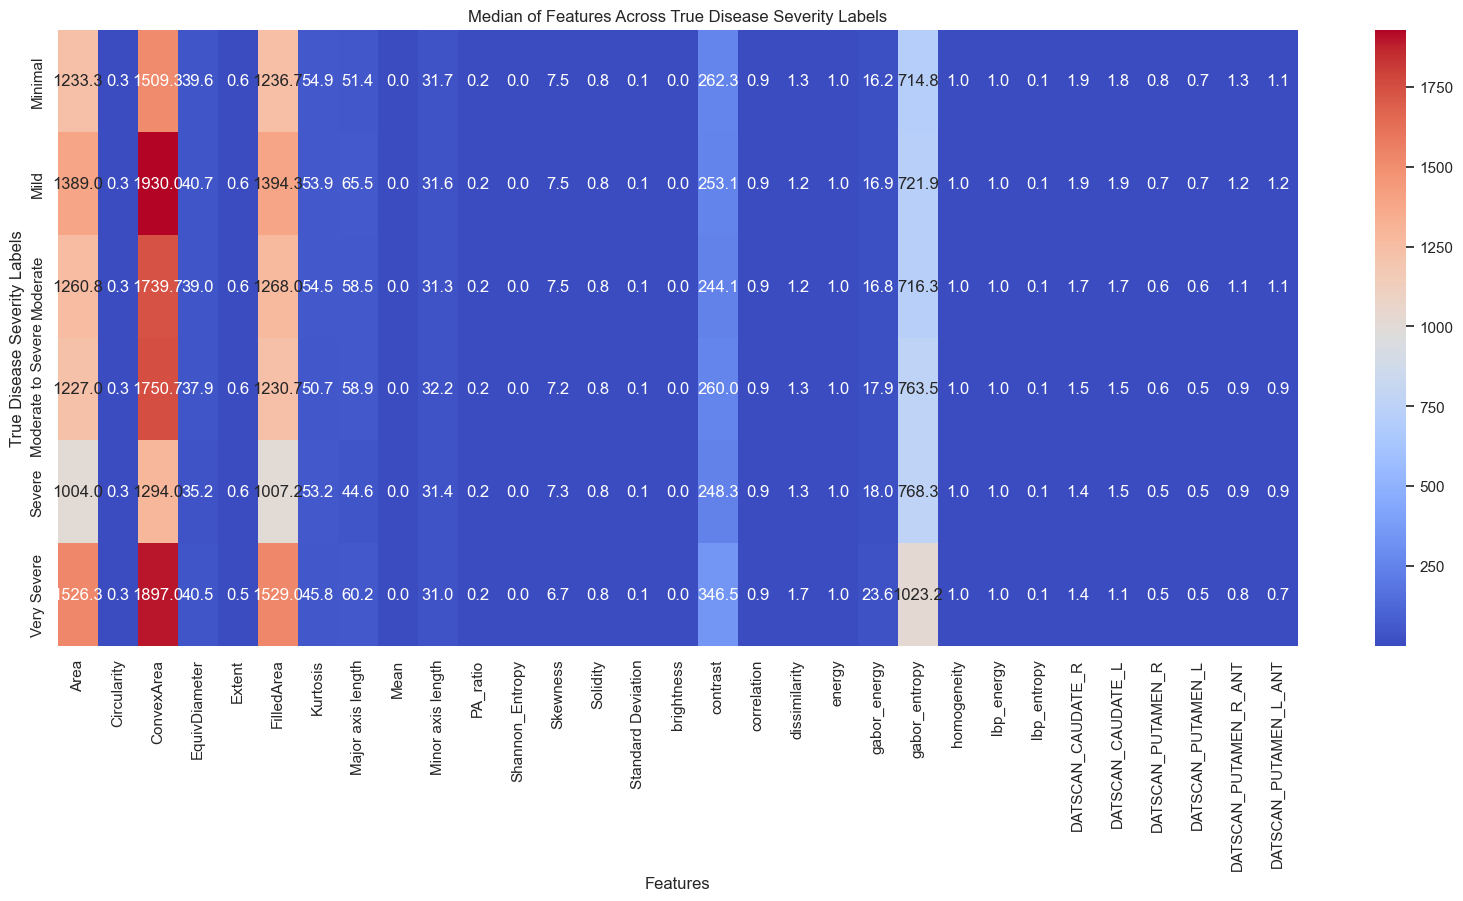

In [56]:
# Calculate median for each true disease severity label
median_results_true_labels = {}

for label in np.unique(y):
    label_data = original_data[y == label]
    median_results_true_labels[label] = label_data.median()

# Convert the results into a DataFrame
median_df_true_labels = pd.DataFrame(median_results_true_labels)

# Replace the numerical labels with actual severity labels using the label encoder
median_df_true_labels.columns = le.inverse_transform(median_df_true_labels.columns)

# Define the correct order of disease severity labels
correct_order = ['Minimal', 'Mild', 'Moderate', 'Moderate to Severe', 'Severe', 'Very Severe']

# Reorder the columns based on the correct disease severity order
median_df_true_labels = median_df_true_labels[correct_order]

# Visualize the median values for true labels (disease severity)
plt.figure(figsize=(20, 8))
sns.heatmap(median_df_true_labels.T, cmap='coolwarm', annot=True, fmt=".1f")
plt.title('Median of Features Across True Disease Severity Labels')
plt.ylabel('True Disease Severity Labels')
plt.xlabel('Features')
plt.show()


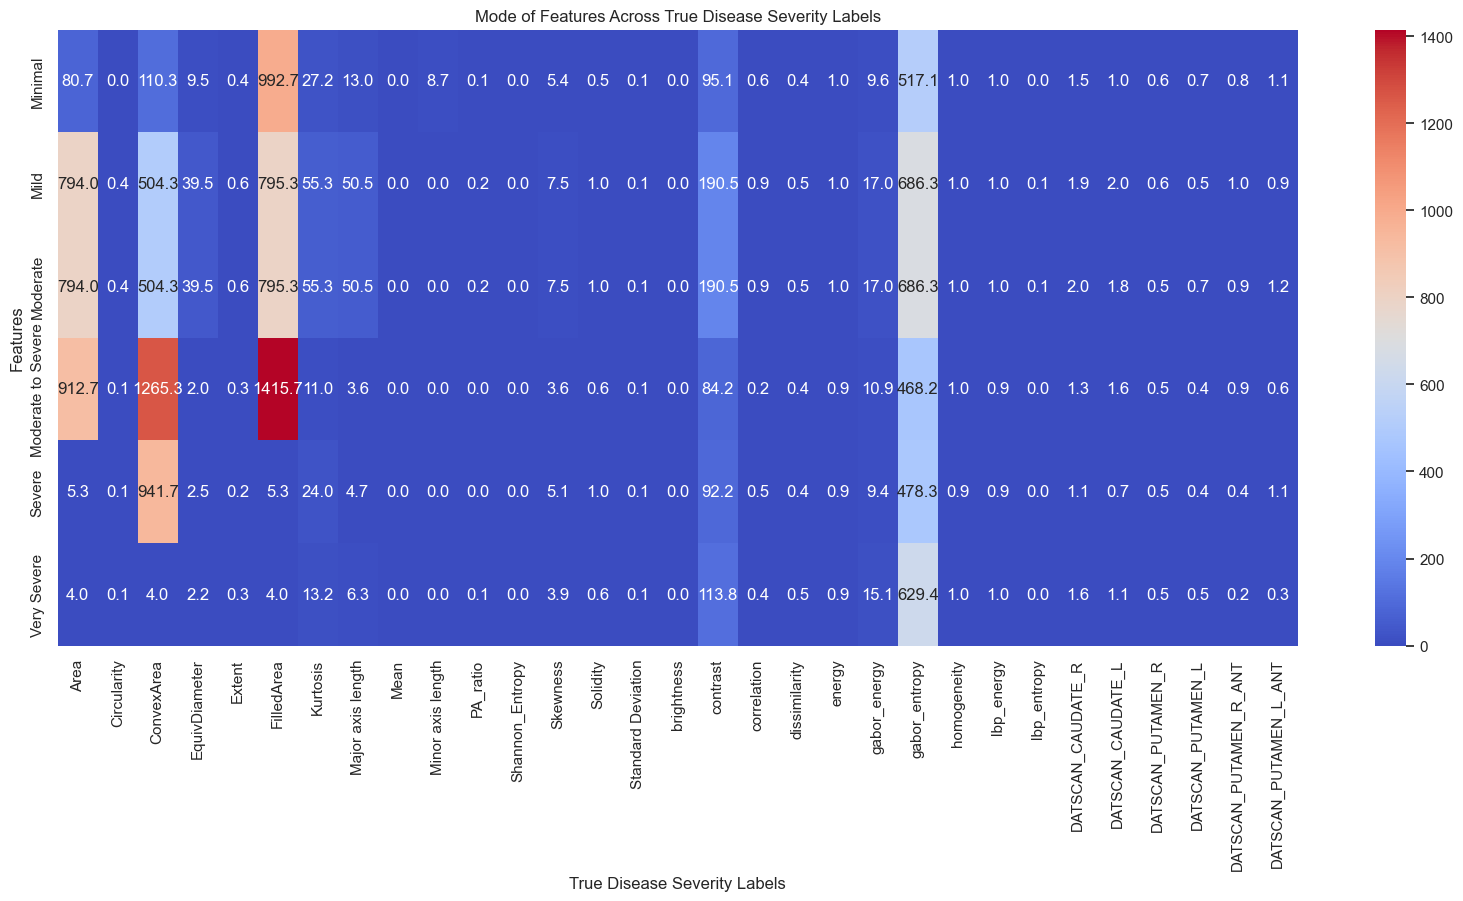

In [57]:
# Function to calculate mode for each feature
def calculate_mode(group):
    return group.mode().iloc[0]  # Select the first mode value in case of multiple modes

# Calculate mode for each true disease severity label
mode_results_true_labels = {}

for label in np.unique(y):
    label_data = original_data[y == label]
    mode_results_true_labels[label] = calculate_mode(label_data)

# Convert the results into a DataFrame
mode_df_true_labels = pd.DataFrame(mode_results_true_labels)

# Replace the numerical labels with actual severity labels using the label encoder
mode_df_true_labels.columns = le.inverse_transform(mode_df_true_labels.columns)

# Define the correct order of disease severity labels
correct_order = ['Minimal', 'Mild', 'Moderate', 'Moderate to Severe', 'Severe', 'Very Severe']

# Reorder the columns based on the correct disease severity order
mode_df_true_labels = mode_df_true_labels[correct_order]

# Visualize the mode values for true labels (disease severity)
plt.figure(figsize=(20, 8))
sns.heatmap(mode_df_true_labels.T, cmap='coolwarm', annot=True, fmt=".1f")
plt.title('Mode of Features Across True Disease Severity Labels')
plt.xlabel('True Disease Severity Labels')
plt.ylabel('Features')
plt.show()


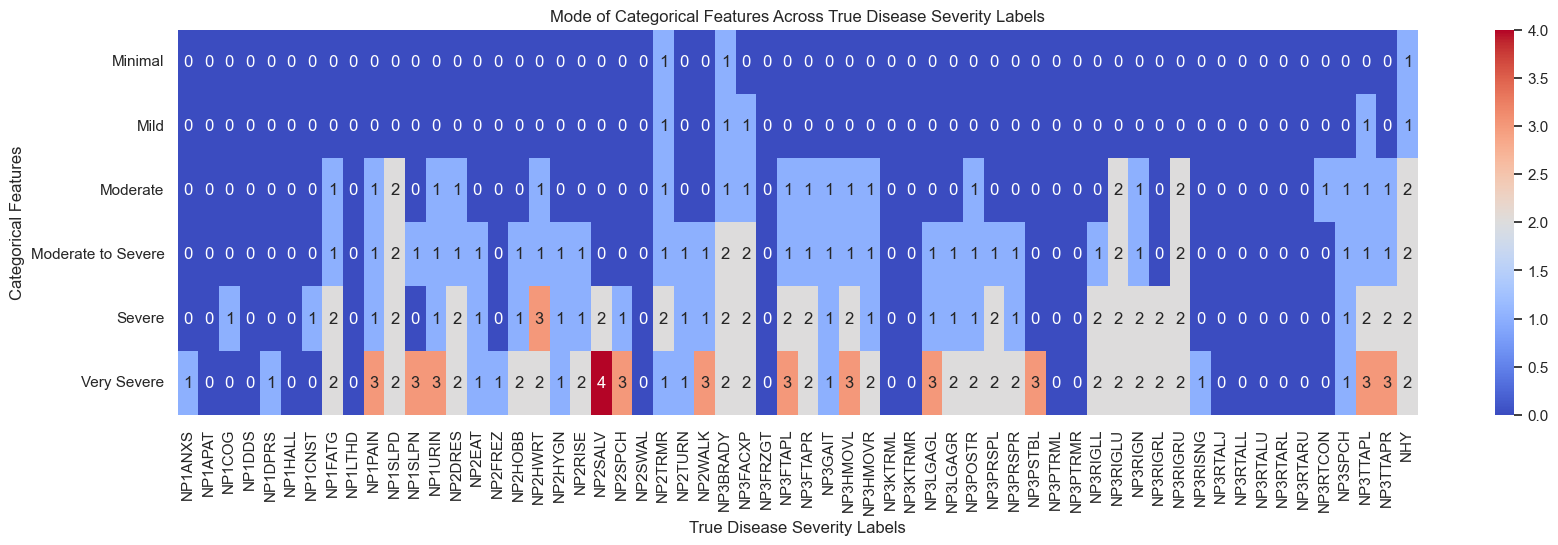

In [58]:
# Function to compute mode for categorical features
def compute_mode(df):
    return df.mode().iloc[0]  # mode() returns a DataFrame; we take the first mode value

# Calculate mode values of categorical features for each true disease severity label (y)
mode_results_true_labels = pd.DataFrame()

for label in np.unique(y):
    label_data = data[y == label][categorical_features]
    mode_results_true_labels[label] = compute_mode(label_data)

# Replace the numerical labels with actual severity labels using the label encoder
mode_results_true_labels.columns = le.inverse_transform(mode_results_true_labels.columns)

# Define the correct order of disease severity labels
correct_order = ['Minimal', 'Mild', 'Moderate', 'Moderate to Severe', 'Severe', 'Very Severe']

# Reorder the columns based on the correct disease severity order
mode_results_true_labels = mode_results_true_labels[correct_order]

# Visualize the mode values of categorical features for each true disease severity label
plt.figure(figsize=(20, 5))
sns.heatmap(mode_results_true_labels.T, cmap='coolwarm', annot=True)
plt.title('Mode of Categorical Features Across True Disease Severity Labels')
plt.xlabel('True Disease Severity Labels')
plt.ylabel('Categorical Features')
plt.show()


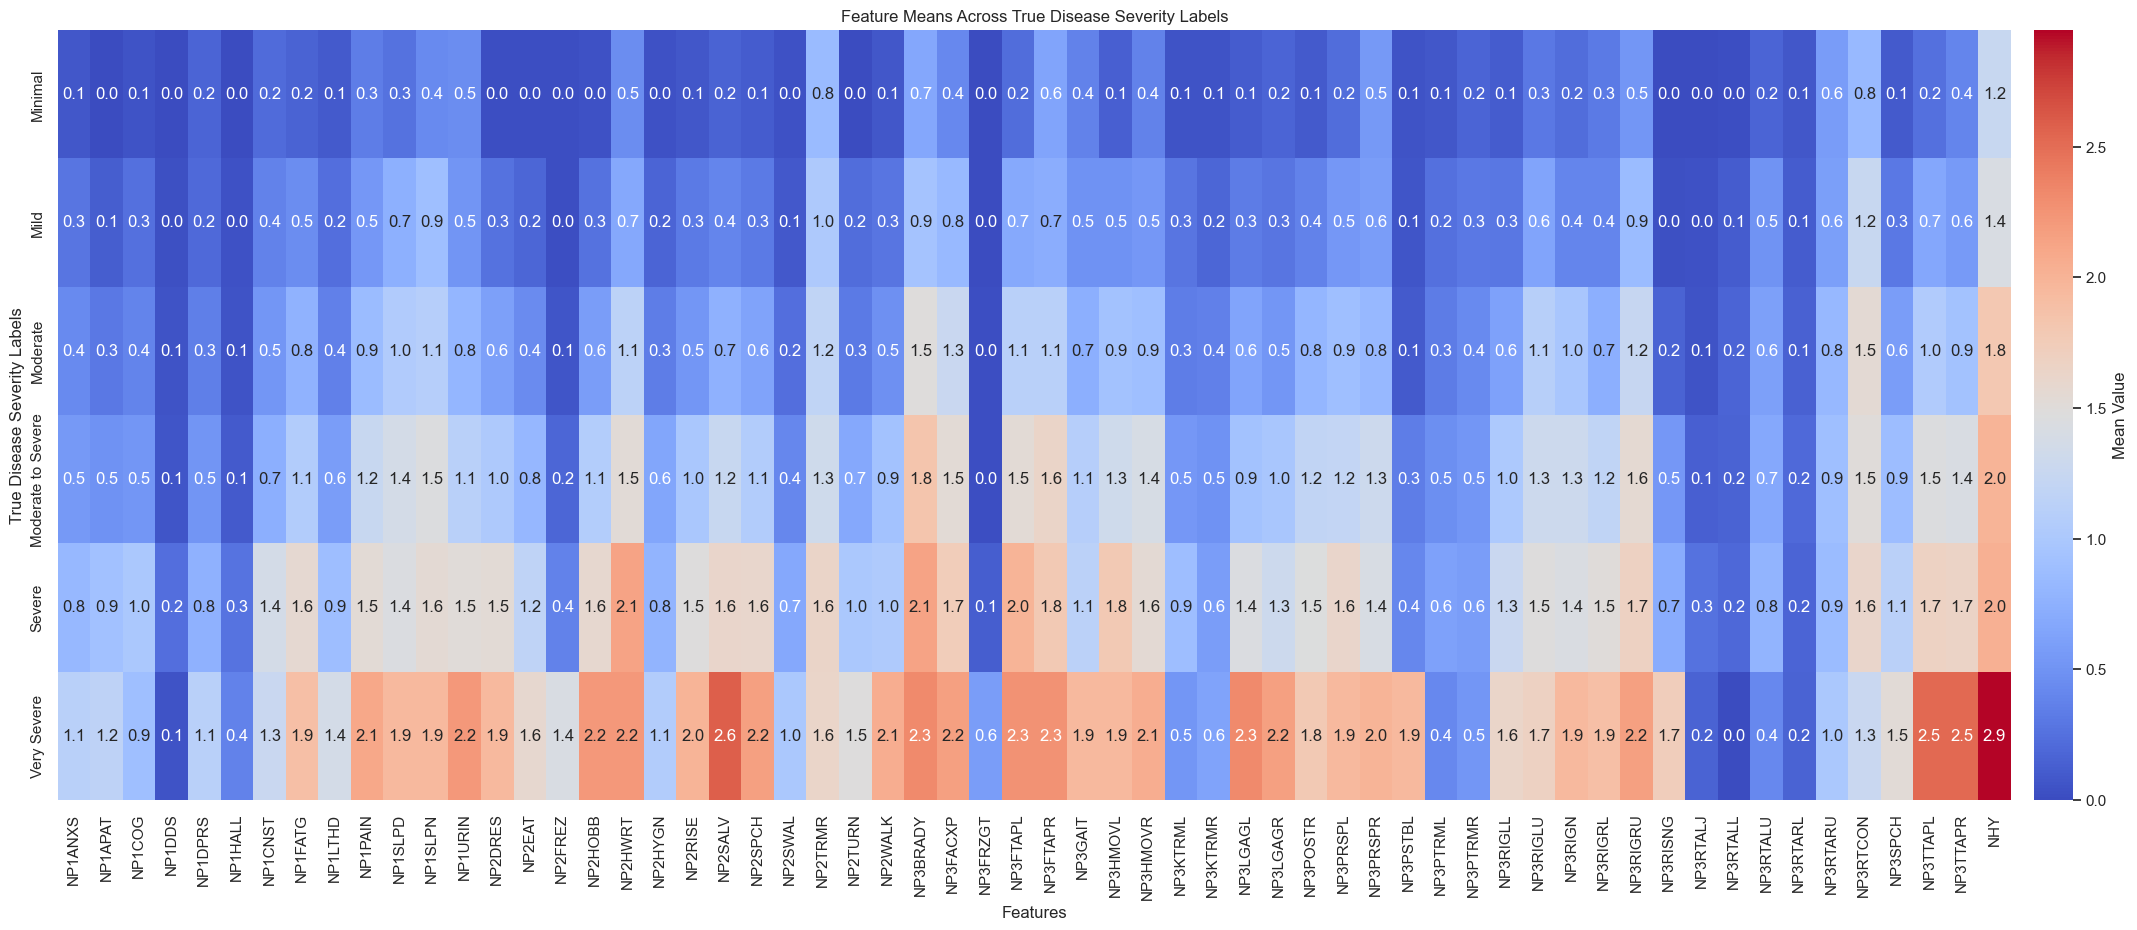

In [59]:
# Calculate mean values of numerical features for each true disease severity label (y)
mean_results_true_labels = data.groupby(y)[categorical_features].mean()  # Use numerical_features instead of categorical_features

# Replace the numerical labels with actual severity labels using the label encoder
mean_results_true_labels.index = le.inverse_transform(mean_results_true_labels.index)

# Define the correct order of disease severity labels
correct_order = ['Minimal', 'Mild', 'Moderate', 'Moderate to Severe', 'Severe', 'Very Severe']

# Reorder the index based on the correct disease severity order
mean_results_true_labels = mean_results_true_labels.reindex(correct_order)

# Visualize the mean values of numerical features for each true disease severity label
plt.figure(figsize=(30, 10))
sns.heatmap(mean_results_true_labels, cmap='coolwarm', annot=True, fmt=".1f", cbar_kws={"orientation": "vertical", "pad": 0.01, "label": "Mean Value"})  # Adjust color bar
plt.title('Feature Means Across True Disease Severity Labels')
plt.ylabel('True Disease Severity Labels')
plt.xlabel('Features')
plt.show()


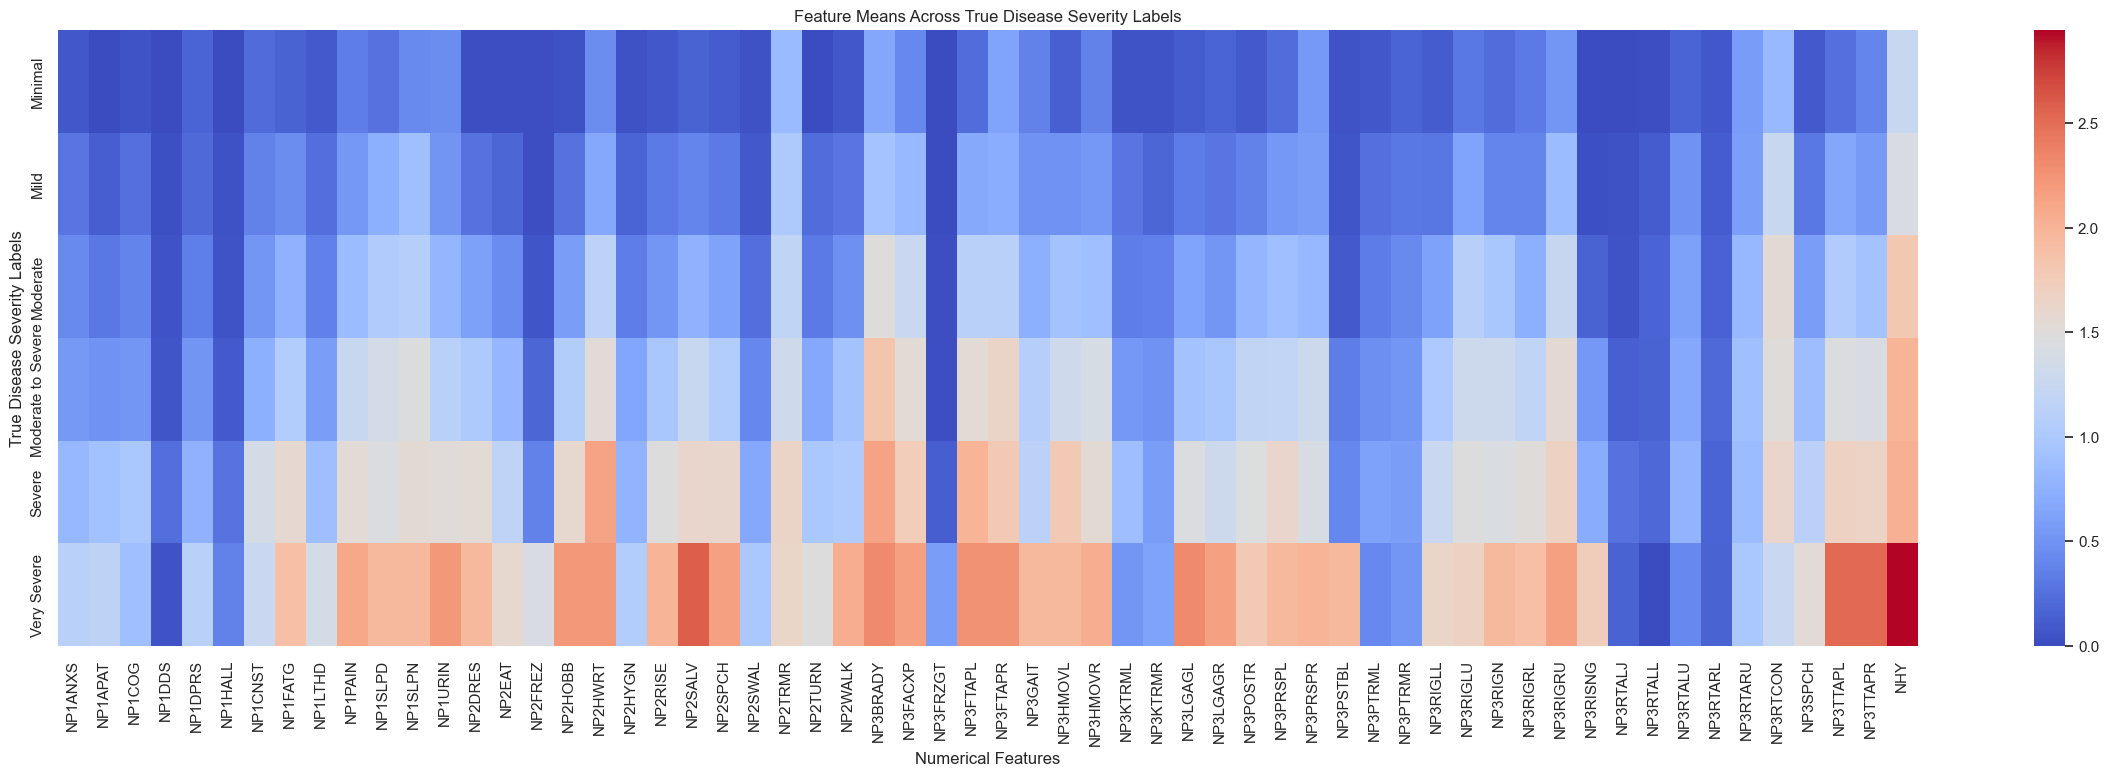

In [60]:
# Calculate mean values of numerical features for each true disease severity label (y)
mean_results_true_labels = data.groupby(y)[categorical_features].mean()

# Replace the numerical labels with actual severity labels using the label encoder
mean_results_true_labels.index = le.inverse_transform(mean_results_true_labels.index)

# Define the correct order of disease severity labels
correct_order = ['Minimal', 'Mild', 'Moderate', 'Moderate to Severe', 'Severe', 'Very Severe']

# Reorder the index based on the correct disease severity order
mean_results_true_labels = mean_results_true_labels.reindex(correct_order)

# Visualize the mean values of numerical features for each true disease severity label
plt.figure(figsize=(30, 8))
sns.heatmap(mean_results_true_labels, cmap='coolwarm', annot=False)  # Set annot=False for no values
plt.title('Feature Means Across True Disease Severity Labels')
plt.ylabel('True Disease Severity Labels')
plt.xlabel('Numerical Features')
plt.show()


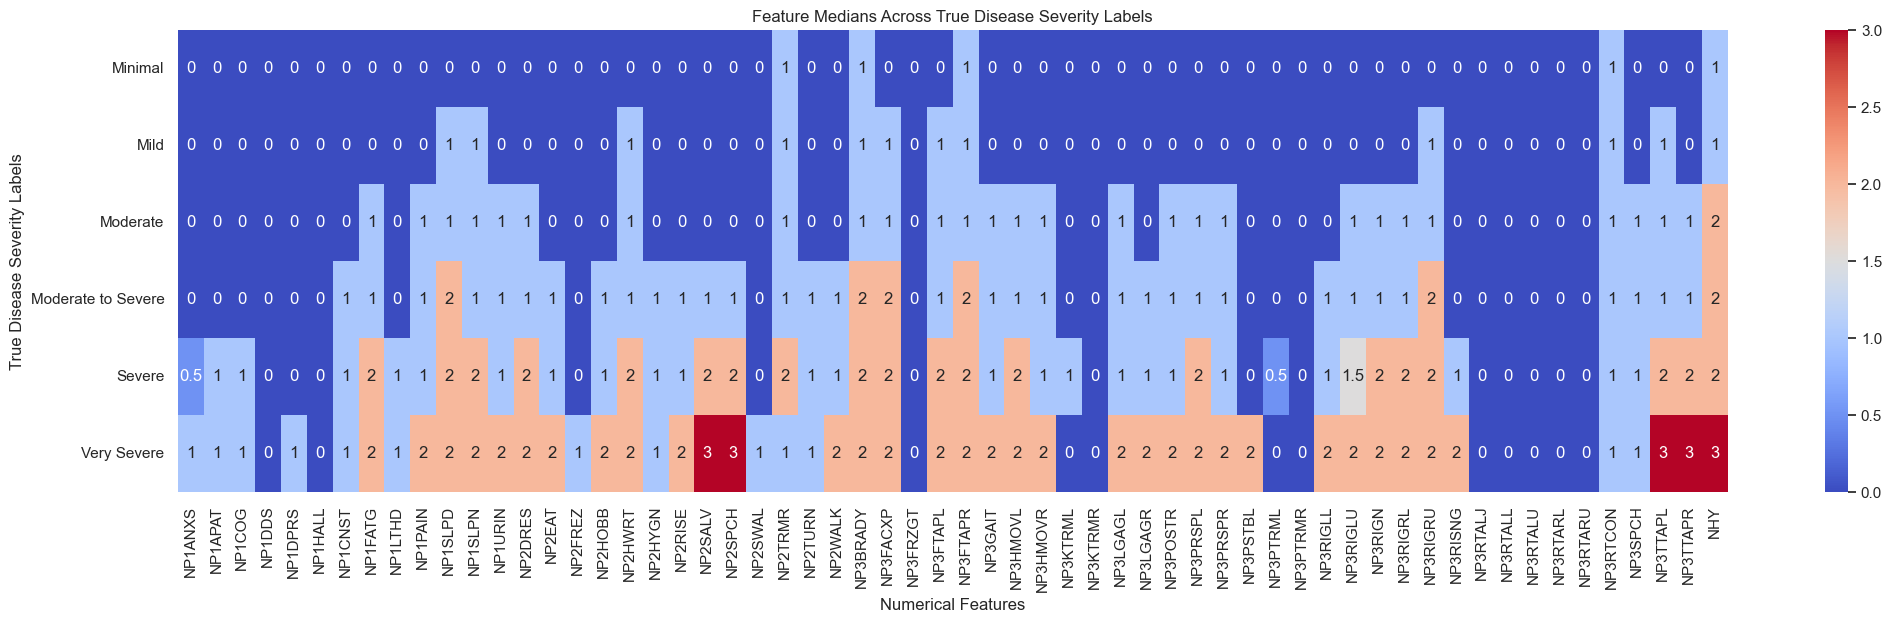

In [61]:
# Calculate median values of numerical features for each true disease severity label (y)
median_results_true_labels = data.groupby(y)[categorical_features].median()

# Replace the numerical labels with actual severity labels using the label encoder
median_results_true_labels.index = le.inverse_transform(median_results_true_labels.index)

# Define the correct order of disease severity labels
correct_order = ['Minimal', 'Mild', 'Moderate', 'Moderate to Severe', 'Severe', 'Very Severe']

# Reorder the index based on the correct disease severity order
median_results_true_labels = median_results_true_labels.reindex(correct_order)

# Visualize the median values of numerical features for each true disease severity label
plt.figure(figsize=(25, 6))
sns.heatmap(median_results_true_labels, cmap='coolwarm', annot=True)  # Set annot=False for no values
plt.title('Feature Medians Across True Disease Severity Labels')
plt.ylabel('True Disease Severity Labels')
plt.xlabel('Numerical Features')
plt.show()


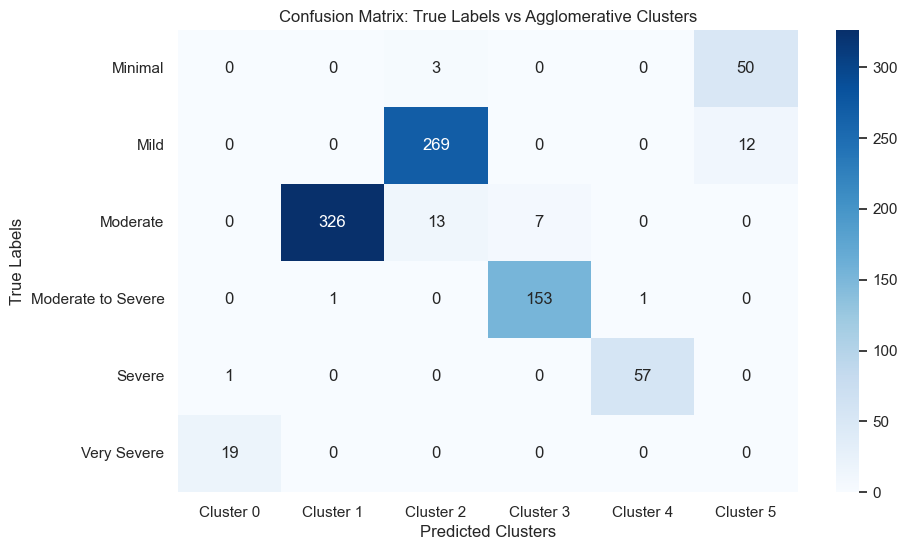

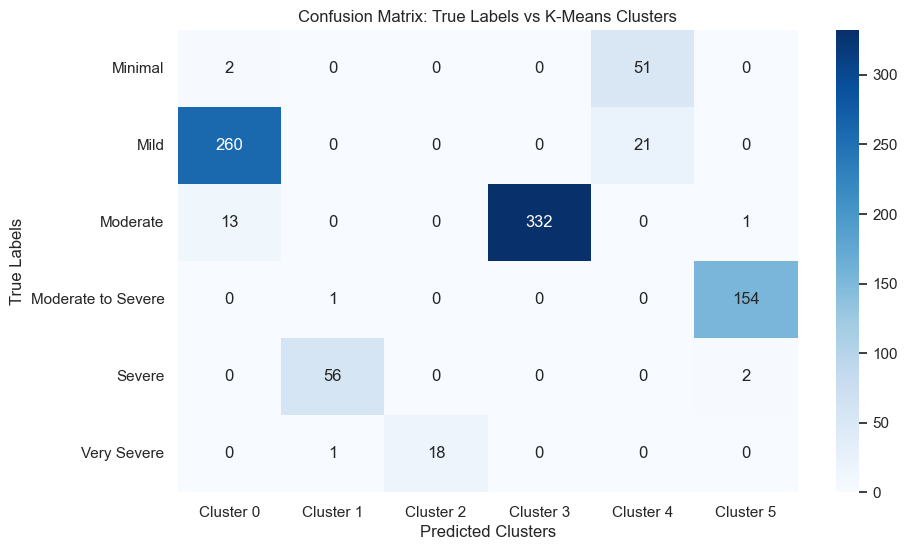

In [62]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Function to plot the confusion matrix (or overlap between clusters and true labels)
def plot_confusion_matrix(y_true, y_pred, title, true_order, pred_order):
    # Create confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Reorder the confusion matrix according to the true and predicted label orders
    cm_ordered = cm[true_order, :][:, pred_order]

    # Convert confusion matrix into a DataFrame for easier plotting
    cm_df = pd.DataFrame(cm_ordered, 
                         index=le.inverse_transform(np.array(true_order)),  # True labels in specified order
                         columns=[f"Cluster {i}" for i in pred_order])  # Predicted clusters in specified order
    
    plt.figure(figsize=(10, 6))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('True Labels')
    plt.xlabel('Predicted Clusters')
    plt.show()

# Define the correct order of true disease severity labels
true_order = [1, 0, 2, 3, 4, 5]  # Adjust these indices to match the labels in `le`
# Define the correct order for predicted clusters (this can be adjusted based on your analysis)
pred_order = list(range(len(np.unique(agg_clusters))))  # Predicted clusters in their natural order

# Plot confusion matrix for Agglomerative Clustering
plot_confusion_matrix(y, agg_clusters, "Confusion Matrix: True Labels vs Agglomerative Clusters", true_order, pred_order)

# Plot confusion matrix for K-Means Clustering
plot_confusion_matrix(y, kmeans_clusters, "Confusion Matrix: True Labels vs K-Means Clusters", true_order, pred_order)


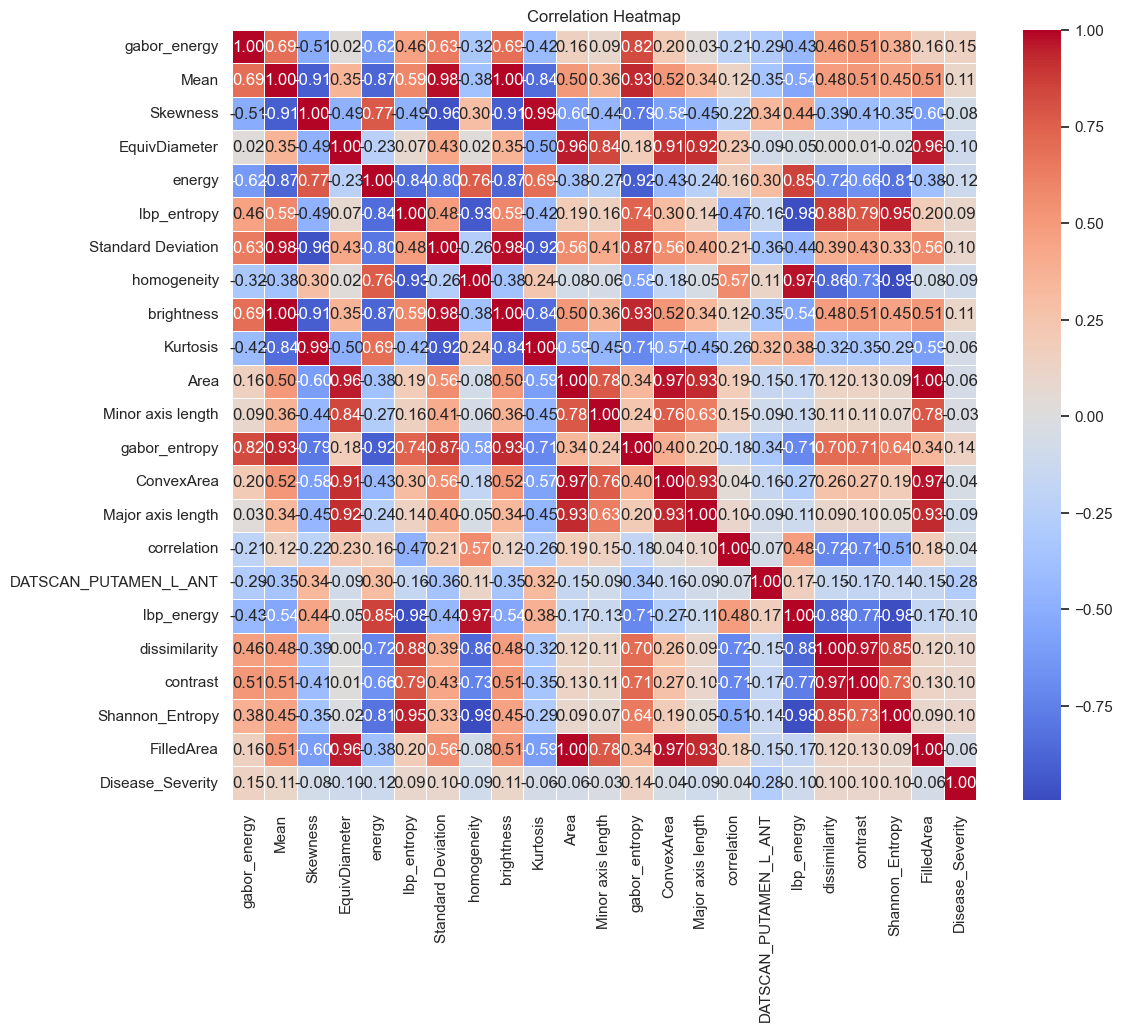

Point Biserial Correlation Results:
                       Correlation       p-value
DATSCAN_PUTAMEN_L_ANT    -0.280198  6.494002e-18
gabor_energy              0.151001  4.646408e-06
gabor_entropy             0.138877  2.568989e-05
energy                   -0.118949  3.181829e-04
Mean                      0.105780  1.378692e-03
brightness                0.105780  1.378692e-03
contrast                  0.103980  1.664506e-03
lbp_energy               -0.103074  1.828295e-03
EquivDiameter            -0.103038  1.834989e-03
Shannon_Entropy           0.102745  1.891275e-03
dissimilarity             0.102465  1.946466e-03
Standard Deviation        0.095476  3.902457e-03
Major axis length        -0.094639  4.229298e-03
homogeneity              -0.093655  4.645204e-03
lbp_entropy               0.091149  5.876505e-03
Skewness                 -0.079425  1.643556e-02
Kurtosis                 -0.063557  5.502522e-02
FilledArea               -0.060154  6.940766e-02
Area                     -0.06007

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr, f_oneway, chi2_contingency
from sklearn.preprocessing import LabelEncoder

# Load your dataset
data = pd.read_csv("B:/Projects/PycharmProjects/PPMI_Research_on_Parkinson's/src/mahbub/finalDatasetWithUPDRSScore.csv")

# Define your features and target variable
features_to_test = [
    'gabor_energy', 'Mean', 'Skewness', 'EquivDiameter', 'energy', 'lbp_entropy', 'Standard Deviation', 'homogeneity', 'brightness', 'Kurtosis', 'Area', 'Minor axis length', 'gabor_entropy', 'ConvexArea', 'Major axis length', 'correlation', 'DATSCAN_PUTAMEN_L_ANT', 'lbp_energy', 'dissimilarity', 'contrast', 'Shannon_Entropy', 'FilledArea'
]
target_variable = 'Disease_Severity'

# Encode categorical target variable if necessary
label_encoder = LabelEncoder()
data[target_variable] = label_encoder.fit_transform(data[target_variable])

# Calculate correlations
numerical_data = data[features_to_test + [target_variable]]

# Correlation matrix
correlation_matrix = numerical_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Initialize dictionaries to store results
point_biserial_results = {}
anova_results = {}
chi_square_results = {}

# Point Biserial Correlation (for binary target)
for feature in features_to_test:
    if data[feature].dtype in [float, int]:  # Ensure the feature is numerical
        correlation, p_value = pointbiserialr(data[feature], data[target_variable])
        point_biserial_results[feature] = (correlation, p_value)

# Convert results to DataFrame
point_biserial_df = pd.DataFrame.from_dict(point_biserial_results, orient='index', columns=['Correlation', 'p-value'])
point_biserial_df.sort_values(by='p-value', ascending=True, inplace=True)

# ANOVA (for multi-class target)
unique_categories = data[target_variable].unique()
if len(unique_categories) > 2:  # Check if target variable is multi-class
    for feature in features_to_test:
        if data[feature].dtype in [float, int]:  # Ensure the feature is numerical
            groups = [data[data[target_variable] == category][feature] for category in unique_categories]
            f_stat, p_value = f_oneway(*groups)
            anova_results[feature] = (f_stat, p_value)

    # Convert results to DataFrame
    anova_df = pd.DataFrame.from_dict(anova_results, orient='index', columns=['F-statistic', 'p-value'])
    anova_df.sort_values(by='p-value', ascending=True, inplace=True)

# Chi-Square Test (for categorical features)
categorical_features = ['NP3LGAGL', 'NP2FREZ', 'NP2TURN', 'NP3KTRMR', 'NP3TTAPL', 'NP3SPCH', 'NP3RIGRL', 'NP2HYGN']
for feature in categorical_features:
    if data[feature].dtype == 'object':  # Ensure the feature is categorical
        contingency_table = pd.crosstab(data[feature], data[target_variable])
        chi2, p, dof, ex = chi2_contingency(contingency_table)
        chi_square_results[feature] = p

# Convert results to DataFrame
chi_square_df = pd.DataFrame.from_dict(chi_square_results, orient='index', columns=['p-value'])
chi_square_df.sort_values(by='p-value', ascending=True, inplace=True)

# Print results
print("Point Biserial Correlation Results:")
print(point_biserial_df)

if len(unique_categories) > 2:
    print("\nANOVA Results:")
    print(anova_df)

print("\nChi-Square Test Results:")
print(chi_square_df)


Pairwise p-values for each feature:
                          V1_V2         V1_V3         V1_V4     V2_V3  \
Area                   0.038717  1.614968e-02  2.530487e-01  0.745365   
ConvexArea             0.055100  4.103393e-02  3.536597e-01  0.923949   
DATSCAN_PUTAMEN_L_ANT  0.000110  4.752675e-08  1.364118e-22  0.064677   
EquivDiameter          0.112713  7.876782e-02  9.159925e-01  0.842686   
FilledArea             0.038375  1.559250e-02  2.512370e-01  0.736107   
Kurtosis               0.000928  4.050181e-05  1.154652e-04  0.317051   
Major axis length      0.122352  2.118603e-01  7.985614e-01  0.760574   
Mean                   0.028002  5.515199e-04  4.391060e-04  0.173317   
Minor axis length      0.196964  8.080288e-02  6.511015e-01  0.622649   
Shannon_Entropy        0.420556  3.162629e-01  7.021595e-02  0.766218   
Skewness               0.001513  3.769193e-05  6.777224e-05  0.252115   
Standard Deviation     0.007960  7.929339e-05  1.432595e-04  0.150632   
brightness     

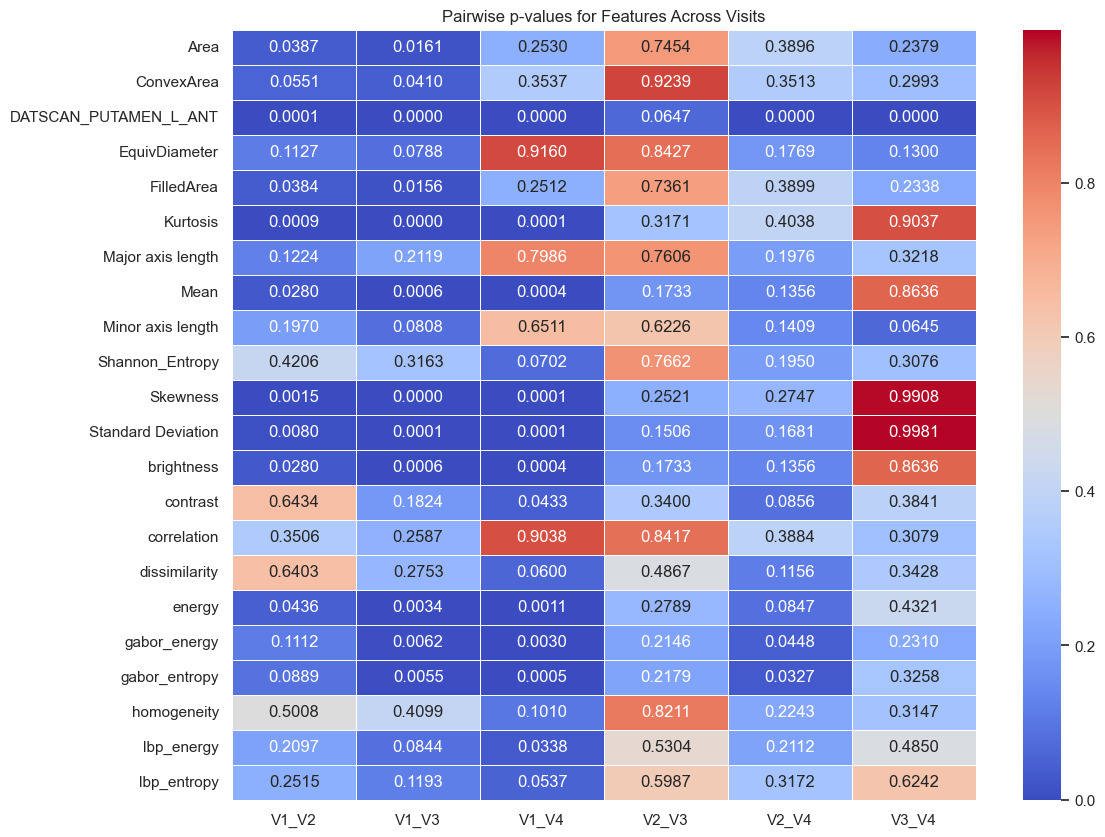

In [64]:
import pandas as pd
from scipy.stats import ttest_ind
import numpy as np

# Load your dataset
data = pd.read_csv("B:/Projects/PycharmProjects/PPMI_Research_on_Parkinson's/src/mahbub/finalDatasetWithUPDRSScore.csv")

# Define your features and visits
features_to_test = [
   'gabor_energy', 'Mean', 'Skewness', 'EquivDiameter', 'energy', 'lbp_entropy', 'Standard Deviation', 'homogeneity', 'brightness', 'Kurtosis', 'Area', 'Minor axis length', 'gabor_entropy', 'ConvexArea', 'Major axis length', 'correlation', 'DATSCAN_PUTAMEN_L_ANT', 'lbp_energy', 'dissimilarity', 'contrast', 'Shannon_Entropy', 'FilledArea'
]
visit_pairs = [('V1', 'V2'), ('V1', 'V3'), ('V1', 'V4'), ('V2', 'V3'), ('V2', 'V4'), ('V3', 'V4')]

# Initialize dictionary to store results
pairwise_p_values = {}

# Iterate over each feature
for feature in features_to_test:
    feature_p_values = {}
    for v1, v2 in visit_pairs:
        # Subset data for each visit
        data_v1 = data[data['Visit'] == v1][feature].dropna()
        data_v2 = data[data['Visit'] == v2][feature].dropna()

        if len(data_v1) > 1 and len(data_v2) > 1:  # Ensure there are enough data points
            # Perform t-test
            t_stat, p_value = ttest_ind(data_v1, data_v2, nan_policy='omit')
            feature_p_values[f"{v1}_{v2}"] = p_value
        else:
            feature_p_values[f"{v1}_{v2}"] = np.nan  # Not enough data for comparison

    # Store results
    pairwise_p_values[feature] = feature_p_values

# Convert results to DataFrame for better readability
pairwise_p_values_df = pd.DataFrame(pairwise_p_values).T
pairwise_p_values_df.sort_index(inplace=True)

# Save results to CSV
pairwise_p_values_df.to_csv("pairwise_p_values.csv")

# Print results
print("Pairwise p-values for each feature:")
print(pairwise_p_values_df)
import seaborn as sns
import matplotlib.pyplot as plt

# Load the DataFrame from CSV if needed
# pairwise_p_values_df = pd.read_csv("pairwise_p_values.csv", index_col=0)

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pairwise_p_values_df, annot=True, cmap="coolwarm", fmt=".4f", linewidths=0.5)
plt.title("Pairwise p-values for Features Across Visits")
plt.show()


In [65]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Initialize LDA with the number of components equal to the number of classes - 1
lda = LinearDiscriminantAnalysis(n_components=2)  # Change n_components based on how many classes you have

# Fit LDA model
lda.fit(X_train, y_train)

# Transform training data to the LDA space
X_train_lda = lda.transform(X_train)

# Transform test data to LDA space
X_test_lda = lda.transform(X_test)

# Get LDA coefficients (scaling values)
lda_coefficients = lda.coef_

# Create a DataFrame to store the coefficients for better visualization
feature_names = X.columns  # Get feature names from your feature dataset
lda_coeff_df = pd.DataFrame(lda_coefficients, columns=feature_names, index=[f'LD{i+1}' for i in range(lda_coefficients.shape[0])])

# Display the coefficients
print(lda_coeff_df)


ValueError: Shape of passed values is (6, 91), indices imply (6, 304)

Top Features Contributing to LD1 and LD2:
               Feature  LD1 Coefficient  LD2 Coefficient  LD3 Coefficient  \
0                 Area        39.419799       -73.359131       -44.266533   
16            contrast        11.859595       -12.884319       -20.520845   
195       NP3KTRMR_3.0         7.984194        -0.031637         5.049871   
250       NP3RIGRL_4.0         6.110470       -19.989182        -1.301886   
287        NP3SPCH_3.0         5.703508       -19.235303        -1.224599   
116          NP2HYGN_4         5.098761        -0.385521        -0.671670   
19              energy         4.612260        14.017746         8.459075   
200       NP3LGAGL_4.0         3.672444       -22.284726        -4.633887   
96            NP2EAT_3         3.269846        -0.701629         0.412209   
224       NP3PSTBL_4.0         2.971881        -0.484511         2.292663   
303            NHY_5.0         2.715595        -1.760309         0.737897   
177        NP3GAIT_4.0         2.7

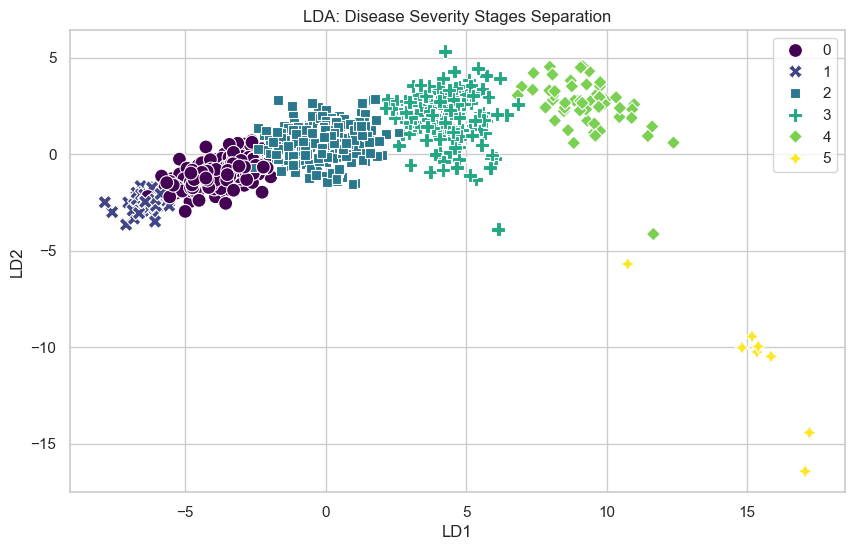

In [66]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("B:/Projects/PycharmProjects/PPMI_Research_on_Parkinson's/src/mahbub/finalDatasetWithUPDRSScore.csv")

# Define non-feature, numerical, and categorical columns
non_feature_columns = ['Patient ID', 'Visit Date', 'UPDRS_SCORE', 'Visit']
numerical_features = [
    'Area', 'Circularity', 'ConvexArea', 'EquivDiameter', 'Extent',
    'FilledArea', 'Kurtosis', 'Major axis length', 'Mean',
    'Minor axis length', 'PA_ratio', 'Shannon_Entropy', 'Skewness',
    'Solidity', 'Standard Deviation', 'brightness', 'contrast',
    'correlation', 'dissimilarity', 'energy', 'gabor_energy',
    'gabor_entropy', 'homogeneity', 'lbp_energy', 'lbp_entropy',
    'DATSCAN_CAUDATE_R', 'DATSCAN_CAUDATE_L', 'DATSCAN_PUTAMEN_R',
    'DATSCAN_PUTAMEN_L', 'DATSCAN_PUTAMEN_R_ANT', 'DATSCAN_PUTAMEN_L_ANT'
]
categorical_features = [
    'NP1ANXS', 'NP1APAT', 'NP1COG', 'NP1DDS', 'NP1DPRS',
    'NP1HALL', 'NP1CNST', 'NP1FATG', 'NP1LTHD', 'NP1PAIN', 'NP1SLPD',
    'NP1SLPN', 'NP1URIN', 'NP2DRES', 'NP2EAT', 'NP2FREZ', 'NP2HOBB',
    'NP2HWRT', 'NP2HYGN', 'NP2RISE', 'NP2SALV', 'NP2SPCH', 'NP2SWAL',
    'NP2TRMR', 'NP2TURN', 'NP2WALK', 'NP3BRADY', 'NP3FACXP', 'NP3FRZGT',
    'NP3FTAPL', 'NP3FTAPR', 'NP3GAIT', 'NP3HMOVL', 'NP3HMOVR', 'NP3KTRML',
    'NP3KTRMR', 'NP3LGAGL', 'NP3LGAGR', 'NP3POSTR', 'NP3PRSPL', 'NP3PRSPR',
    'NP3PSTBL', 'NP3PTRML', 'NP3PTRMR', 'NP3RIGLL', 'NP3RIGLU', 'NP3RIGN',
    'NP3RIGRL', 'NP3RIGRU', 'NP3RISNG', 'NP3RTALJ', 'NP3RTALL', 'NP3RTALU',
    'NP3RTARL', 'NP3RTARU', 'NP3RTCON', 'NP3SPCH', 'NP3TTAPL', 'NP3TTAPR',
    'NHY'
]
target_column = "Disease_Severity"

# Step 1: Store original numerical data before scaling
original_data = data[numerical_features].copy()

# Step 2: Apply MinMax scaling to the data (for later use)
scaler = MinMaxScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Split data into X (features) and y (target)
X = data[numerical_features + categorical_features]
y = data[target_column]

# Encode categorical features
X = pd.get_dummies(X, columns=categorical_features)

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Apply LDA for Dimensionality Reduction
lda = LDA(n_components=5)  # Reduce to 2 dimensions for visualization
X_lda = lda.fit_transform(X, y)
n_clusters = len(np.unique(y))

# Step 3: Extract LDA coefficients (feature importance)
lda_coefficients = lda.scalings_

# Print the top features for each linear discriminant
lda_feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'LD1 Coefficient': lda_coefficients[:, 0],
    'LD2 Coefficient': lda_coefficients[:, 1],
    'LD3 Coefficient': lda_coefficients[:, 2],
    'LD4 Coefficient': lda_coefficients[:, 3],
    'LD5 Coefficient': lda_coefficients[:, 4]
}).sort_values(by='LD1 Coefficient', ascending=False)

print("Top Features Contributing to LD1 and LD2:")
print(lda_feature_importance.head(20))

# Step 4: Visualize the LDA decision boundary
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_lda[:, 0], y=X_lda[:, 1], hue=y, palette="viridis", style=y, s=100)
plt.title('LDA: Disease Severity Stages Separation')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.show()




Feature Contributions per Disease Group:
                          Area  Circularity  ConvexArea  EquivDiameter  \
Disease_Severity                                                         
Mild                  5.748621    -0.852627   11.228946      11.469585   
Minimal              16.109096    -1.531290   19.781183      19.970377   
Moderate            -43.488947     0.245429   -0.443405       1.244553   
Moderate to Severe   15.662773     0.760454  -11.401002     -12.488899   
Severe               95.994664     1.119444  -21.645468     -26.310654   
Very Severe         468.246587    -0.176857  -28.806738     -48.375213   

                      Extent  FilledArea   Kurtosis  Major axis length  \
Disease_Severity                                                         
Mild               -0.764180   -5.683153  -3.560394         -12.793026   
Minimal            -1.398691  -15.814542  -5.222844         -22.475020   
Moderate            0.409804   42.190244  -7.447238           0.060525

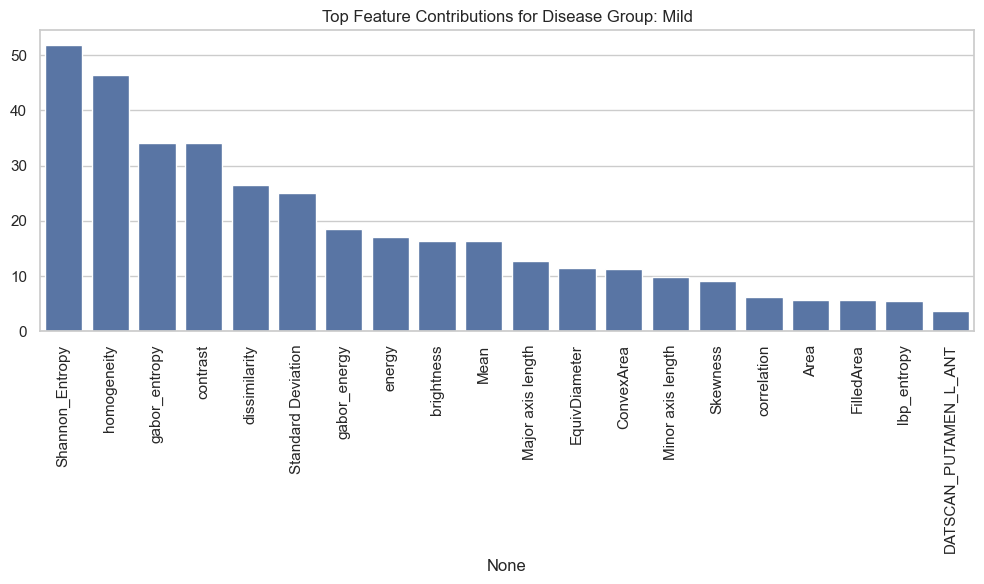

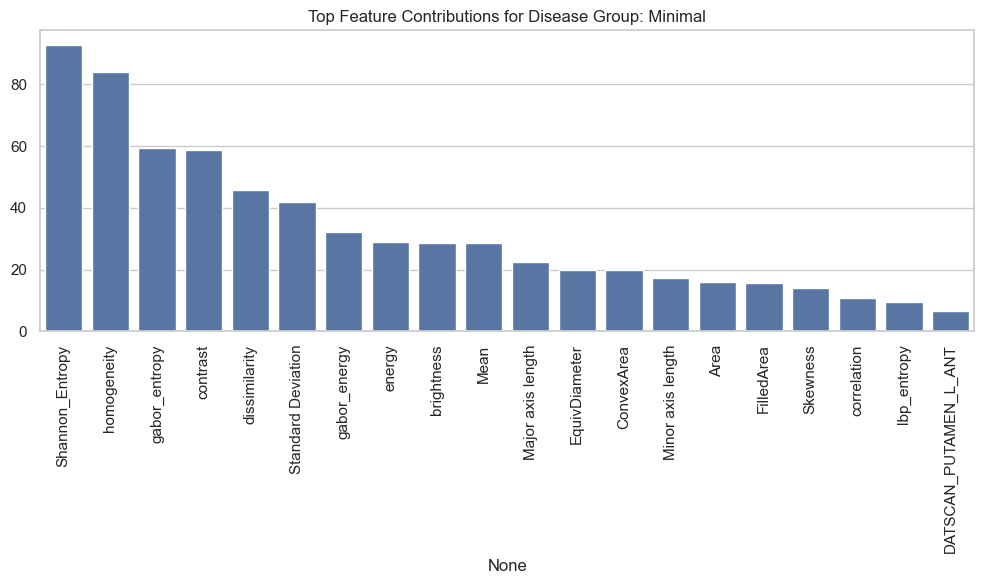

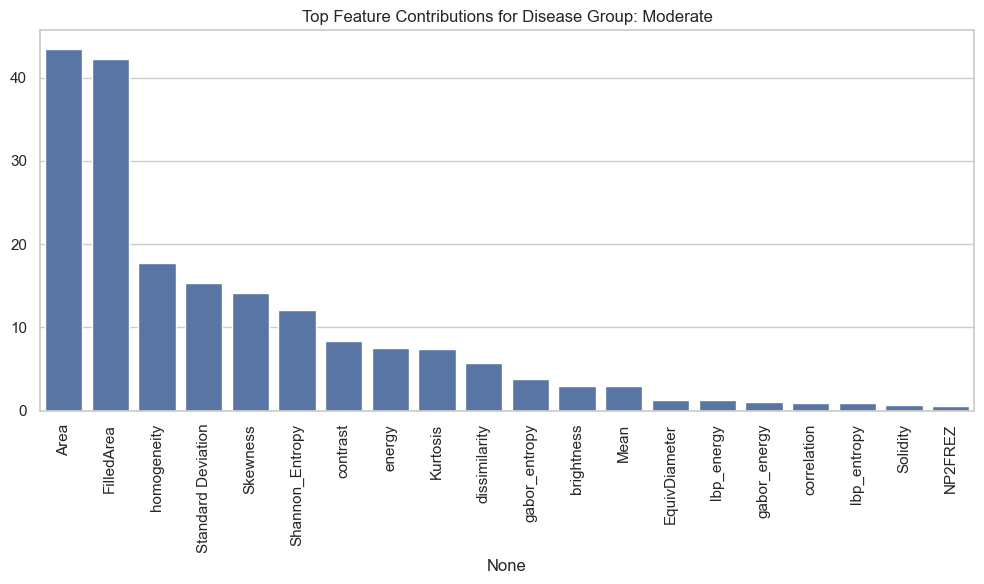

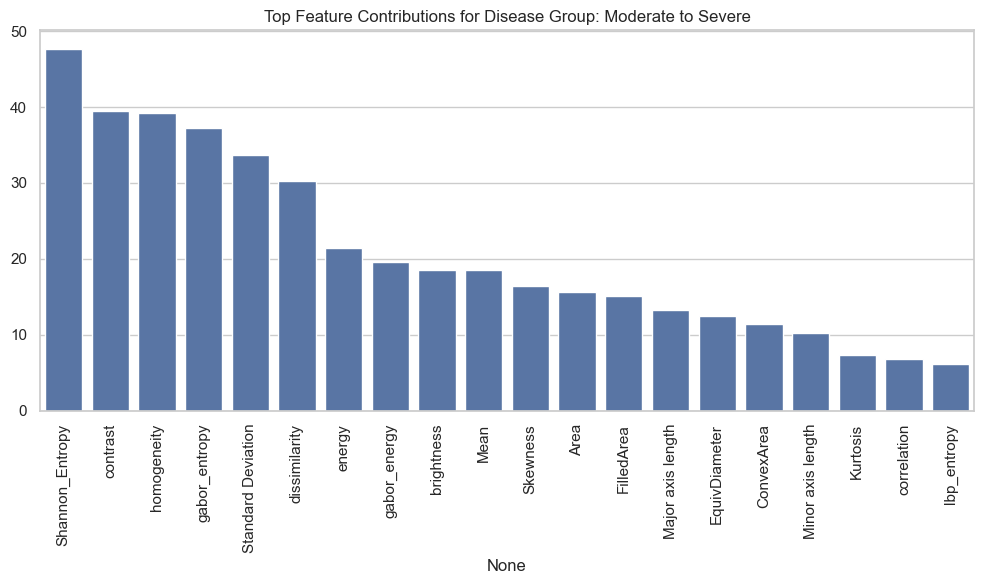

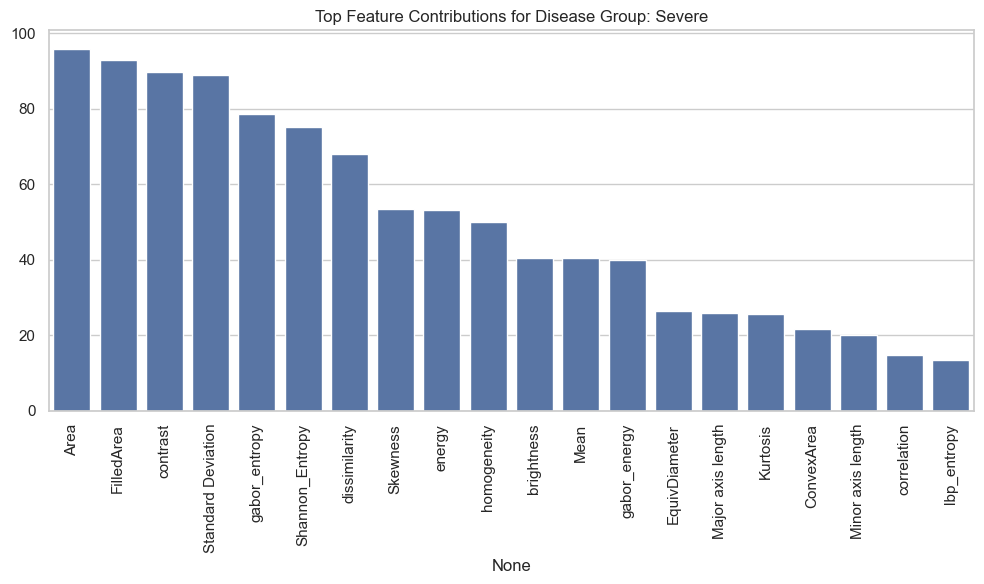

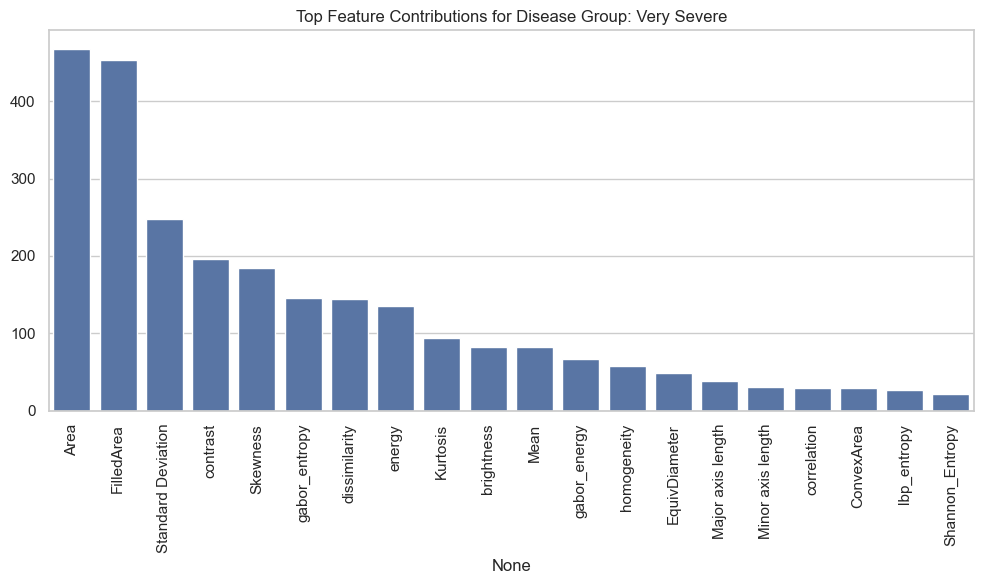

In [67]:
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data (assuming dataset is already loaded earlier)
data = pd.read_csv("B:/Projects/PycharmProjects/PPMI_Research_on_Parkinson's/src/mahbub/finalDatasetWithUPDRSScore.csv")

# Define non-feature, numerical, and categorical columns
non_feature_columns = ['Patient ID', 'Visit Date', 'UPDRS_SCORE', 'Visit']
numerical_features = [
    'Area', 'Circularity', 'ConvexArea', 'EquivDiameter', 'Extent',
    'FilledArea', 'Kurtosis', 'Major axis length', 'Mean',
    'Minor axis length', 'PA_ratio', 'Shannon_Entropy', 'Skewness',
    'Solidity', 'Standard Deviation', 'brightness', 'contrast',
    'correlation', 'dissimilarity', 'energy', 'gabor_energy',
    'gabor_entropy', 'homogeneity', 'lbp_energy', 'lbp_entropy',
    'DATSCAN_CAUDATE_R', 'DATSCAN_CAUDATE_L', 'DATSCAN_PUTAMEN_R',
    'DATSCAN_PUTAMEN_L', 'DATSCAN_PUTAMEN_R_ANT', 'DATSCAN_PUTAMEN_L_ANT'
]
categorical_features = [
    'NP1ANXS', 'NP1APAT', 'NP1COG', 'NP1DDS', 'NP1DPRS',
    'NP1HALL', 'NP1CNST', 'NP1FATG', 'NP1LTHD', 'NP1PAIN', 'NP1SLPD',
    'NP1SLPN', 'NP1URIN', 'NP2DRES', 'NP2EAT', 'NP2FREZ', 'NP2HOBB',
    'NP2HWRT', 'NP2HYGN', 'NP2RISE', 'NP2SALV', 'NP2SPCH', 'NP2SWAL',
    'NP2TRMR', 'NP2TURN', 'NP2WALK', 'NP3BRADY', 'NP3FACXP', 'NP3FRZGT',
    'NP3FTAPL', 'NP3FTAPR', 'NP3GAIT', 'NP3HMOVL', 'NP3HMOVR', 'NP3KTRML',
    'NP3KTRMR', 'NP3LGAGL', 'NP3LGAGR', 'NP3POSTR', 'NP3PRSPL', 'NP3PRSPR',
    'NP3PSTBL', 'NP3PTRML', 'NP3PTRMR', 'NP3RIGLL', 'NP3RIGLU', 'NP3RIGN',
    'NP3RIGRL', 'NP3RIGRU', 'NP3RISNG', 'NP3RTALJ', 'NP3RTALL', 'NP3RTALU',
    'NP3RTARL', 'NP3RTARU', 'NP3RTCON', 'NP3SPCH', 'NP3TTAPL', 'NP3TTAPR',
    'NHY'
]
target_column = "Disease_Severity"

# Scale numerical features
scaler = MinMaxScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Split data into X (features) and y (target)
X = data[numerical_features + categorical_features]
y = data[target_column]

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and fit the LDA model
lda = LDA(n_components=2)
X_lda_train = lda.fit_transform(X_train, y_train)

# Transform the test set
X_lda_test = lda.transform(X_test)

# Convert y_test back to original labels
y_test_labels = le.inverse_transform(y_test)

# Create a DataFrame for the LDA transformed test set and corresponding disease severity labels
lda_test_df = pd.DataFrame(X_lda_test, columns=['LD1', 'LD2'])
lda_test_df['Disease_Severity'] = y_test_labels

# Compute mean LD values per disease state
lda_means = lda_test_df.groupby('Disease_Severity').mean()

# Back-project mean LD values to original feature space using LDA scalings
def get_feature_contributions(lda_means, lda):
    # Only select the first two components from lda.scalings_ (since we have 2 LDA components)
    lda_scalings = lda.scalings_[:, :2]  # Selecting the first 2 components

    # Back-project from LDA space to the original feature space
    feature_contributions = np.dot(lda_means[['LD1', 'LD2']].values, lda_scalings.T)
    
    # Create a DataFrame for the contributions
    contribution_df = pd.DataFrame(
        feature_contributions, 
        index=lda_means.index, 
        columns=X.columns  # Use the original feature names
    )
    
    return contribution_df

# Calculate feature contributions for each disease group
feature_contributions_per_group = get_feature_contributions(lda_means, lda)

# Display feature contributions for each disease group
print("Feature Contributions per Disease Group:")
print(feature_contributions_per_group)

# Optional: Plot the top features for each disease group
def plot_top_features(contribution_df):
    for disease in contribution_df.index:
        contributions = contribution_df.loc[disease]
        top_features = contributions.abs().sort_values(ascending=False)[:20]  # Top 10 features
        
        plt.figure(figsize=(10, 6))
        sns.barplot(x=top_features.index, y=top_features.values)
        plt.title(f"Top Feature Contributions for Disease Group: {disease}")
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

# Plot top features for each disease group
plot_top_features(feature_contributions_per_group)
